# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings , gc, time

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler

#metrics
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

In [2]:
%matplotlib inline
from pylab import rcParams
import warnings
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style = "darkgrid")

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.spyproject',
 '0_EDA.ipynb',
 '1_MlFlow model.ipynb',
 '1_model de scoring.ipynb',
 'app.py',
 'dashboard',
 'dashboard_streamlit.py',
 'Dashbord Flask.ipynb',
 'Dashbord Flask.py',
 'data',
 'function_utils.py',
 'lgbm_importances-01.png',
 'mlruns',
 'model de scoring resampling SMOTE.ipynb',
 'streamlite_apps',
 '__pycache__']

In [4]:
os.listdir('data/source')

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

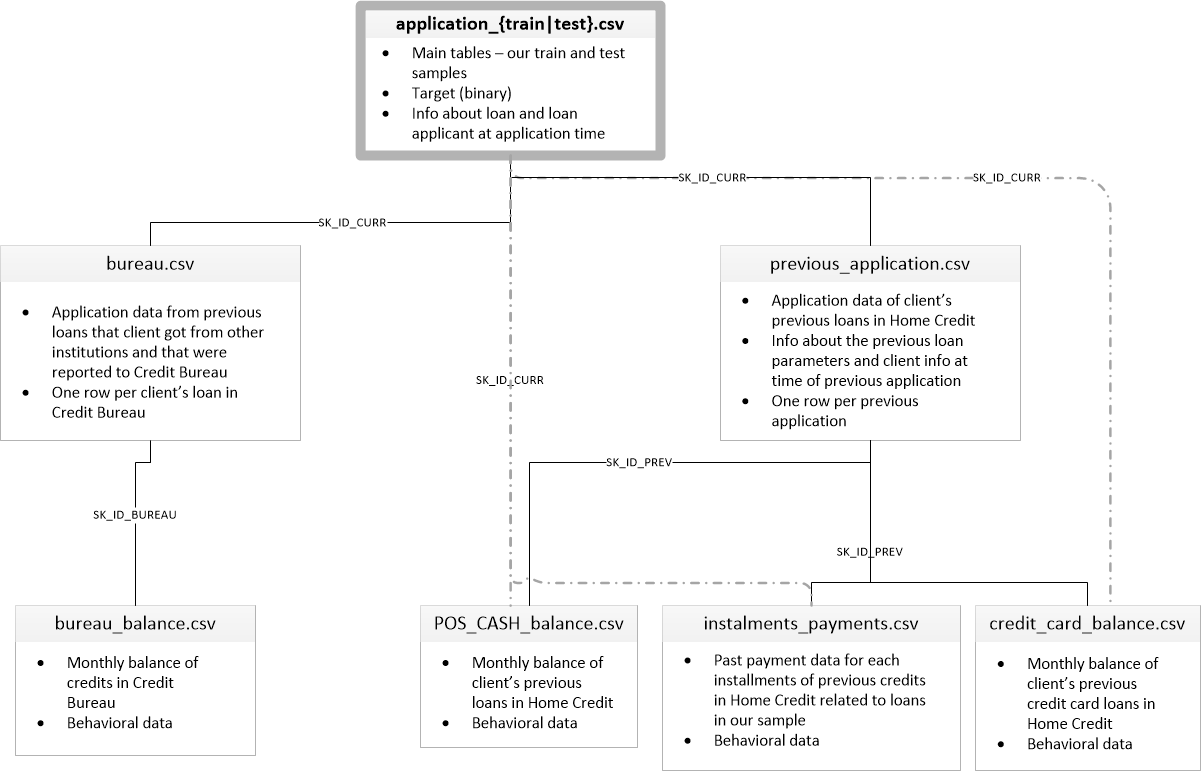

* ## application_{train|test}.csv

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

* ## bureau.csv

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

* ## bureau_balance.csv

Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .
    
* ## POS_CASH_balance.csv

Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

* ## credit_card_balance.csv

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

* ## previous_application.csv

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

* ## installments_payments.csv

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

* ## AccueilCredit_columns_description.csv

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [5]:
path = 'data/source/'
# A completer
filename_apptrain = 'application_train.csv'
filename_apptest = 'application_test.csv'

filename_bureau = 'bureau.csv'
filename_bureau_balance = 'bureau_balance.csv'
filename_ccbalance = 'credit_card_balance.csv'
filename_prevapp = 'previous_application.csv'
filename_POS_CASH_bal = 'POS_CASH_balance.csv'
filename_instpay = 'installments_payments.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [6]:
df = pd.read_csv(path+filename_apptrain,index_col = 'SK_ID_CURR' )

### Balanced data TARGET

In [7]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
LabelEncoder              type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MinMaxScaler              type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
OneHotEncoder             type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
OrdinalEncoder            type         <class 'sklearn.preproces<...>encoders.OrdinalEncoder'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
VarianceThreshold         ABCMeta      <class 'sklearn.feature_s<...>shold.VarianceThreshold'>
df                        DataFrame                TARGET NAME_C<...>07511 rows x 121 columns]
entropy                   function     <function entropy at 0x000001CDD8BED580>
f1_score                  function     <function f1_score at 0x000001CDDA6544A0>
filename_POS_CASH_bal     str          POS_CASH_balance.csv
filename_apptest

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [8]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
100002          24700.5         351000.0  ...                0   
100003          35698.5        1129500.0  ...                0   
100004           6750.0         135000.0  ...                0   
100006          29686.5         297000.0  ...                0   
100007          21865.5         513000.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100002                    0                0                0   
100003                    0                0                0   
100004                    0                0                0   
100006                    0                0                0   
100007                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
100002                            0.0                        0.0   
100003                            0.0                        0.0   
100004                            0.0                        0.0   
100006                            NaN                        NaN   
100007                            0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
100002                             0.0                        0.0   
100003                             0.0                        0.0   
100004                             0.0                        0.0   
100006                             NaN                        NaN   
100007                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
100002                            0.0                         1.0  
100003                            0.0                         0.0  
100004                            0.0                         0.0  
100006                            NaN                         NaN  
100007                            0.0                         0.0  

[5 rows x 121 columns]

In [9]:
df.columns.to_list()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [10]:
df.tail()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456254           1         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
456251                   N             0          157500.0    254700.0   
456252                   Y             0           72000.0    269550.0   
456253                   Y             0          153000.0    677664.0   
456254                   Y             0          171000.0    370107.0   
456255                   N             0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
456251          27558.0         225000.0  ...                0   
456252          12001.5         225000.0  ...                0   
456253          29979.0         585000.0  ...                0   
456254          20205.0         319500.0  ...                0   
456255          49117.5         675000.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
456251                    0                0                0   
456252                    0                0                0   
456253                    0                0                0   
456254                    0                0                0   
456255                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
456251                            NaN                        NaN   
456252                            NaN                        NaN   
456253                            1.0                        0.0   
456254                            0.0                        0.0   
456255                            0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
456251                             NaN                        NaN   
456252                             NaN                        NaN   
456253                             0.0                        1.0   
456254                             0.0                        0.0   
456255                             0.0                        2.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
456251                            NaN                         NaN  
456252                            NaN                         NaN  
456253                            0.0                         1.0  
456254                            0.0                         0.0  
456255                            0.0                         1.0  

[5 rows x 121 columns]

In [11]:
df.sample(5)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
144894           0         Cash loans           M            N   
194442           0         Cash loans           F            Y   
417744           0         Cash loans           F            N   
263954           1         Cash loans           M            Y   
189960           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
144894                   Y             0          157500.0    540000.0   
194442                   Y             1          247500.0   1125171.0   
417744                   Y             0          540000.0    997335.0   
263954                   Y             0          180000.0    284400.0   
189960                   Y             0          126000.0    592560.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
144894          25150.5         540000.0  ...                0   
194442          45958.5        1035000.0  ...                0   
417744          29290.5         832500.0  ...                0   
263954          13963.5         225000.0  ...                0   
189960          31153.5         450000.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
144894                    0                0                0   
194442                    0                0                0   
417744                    0                0                0   
263954                    0                0                0   
189960                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
144894                            0.0                        0.0   
194442                            0.0                        0.0   
417744                            1.0                        1.0   
263954                            0.0                        0.0   
189960                            0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
144894                             0.0                        0.0   
194442                             0.0                        0.0   
417744                             0.0                        0.0   
263954                             0.0                        0.0   
189960                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
144894                            0.0                         1.0  
194442                            0.0                         3.0  
417744                            0.0                         3.0  
263954                            0.0                         1.0  
189960                            0.0                         2.0  

[5 rows x 121 columns]

### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [13]:
df.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [14]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.nunique()

TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

## Suppression des variables ne possedant qu'une seul valeur

In [15]:
col_uniq_to_drop = df.columns[(df.nunique()==1)]

In [16]:
df.drop(columns=col_uniq_to_drop,inplace=True)

#### variables discretes

In [17]:
df.select_dtypes(exclude=object).nunique()

TARGET                               2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
CNT_FAM_MEMBERS                     17
REGION_RATING_CLIENT                 3
REGION_RATING_CLIENT_W_CITY          3
HOUR_APPR_PROCESS_START             24
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY   

In [18]:
var_discret = df.select_dtypes(exclude=object).nunique().index[df.select_dtypes(exclude=object).nunique()<=17].tolist()
var_discret.remove('TARGET')
print(var_discret)

['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']


In [19]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [20]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [21]:
print("Il y a {} lignes dupliquées".format( df.duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df.reset_index()["SK_ID_CURR"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

In [22]:
df.apply(lambda x: np.sum(x=="XNA"))

TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         4
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [23]:
colna = dict()
for col in df.columns:
    if any(df[col]=='XNA'):
        print(col,' : {} nombre de Xna'.format( np.sum(df[col]=='XNA') ))
    

CODE_GENDER  : 4 nombre de Xna
ORGANIZATION_TYPE  : 55374 nombre de Xna


In [24]:
#suppression des modalités XNA
df = df.loc[df.CODE_GENDER != 'XNA']
df[df=='XNA']=np.nan

some errors!!!!


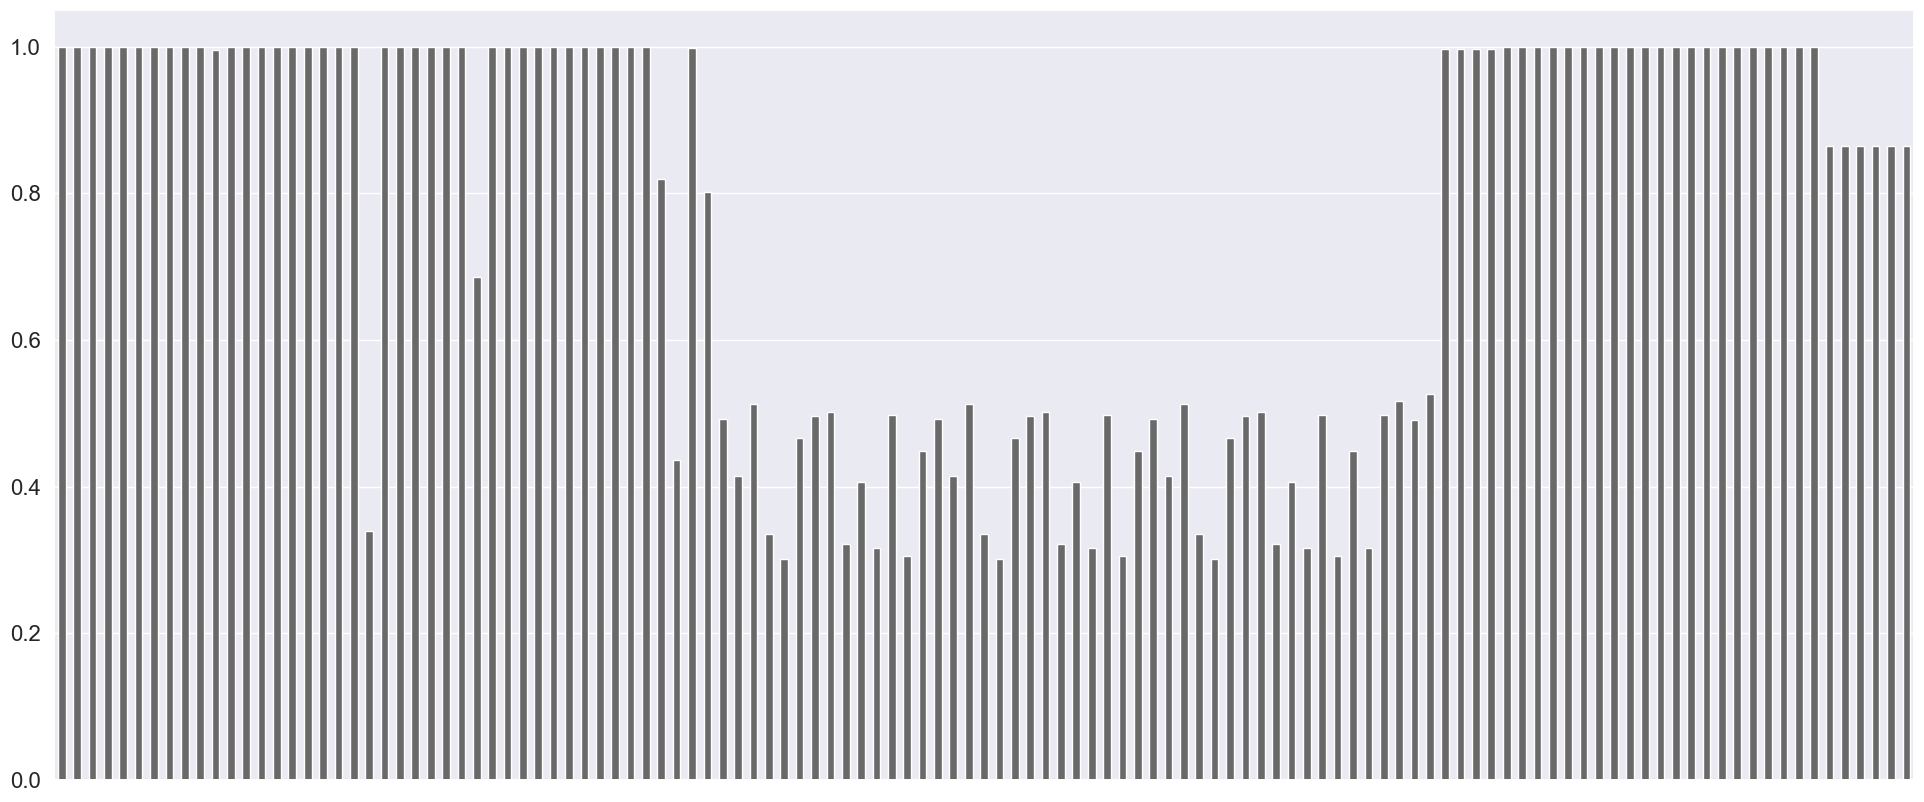

In [25]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df)
except:
    print('some errors!!!!');

In [26]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for col in data.columns:
        valeurs[col] = []
        valeurs[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        valeurs[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [27]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
compute_nb_mising_values(df)

Taux de valeurs non nulles  \
TARGET                                            100.00   
HOUR_APPR_PROCESS_START                           100.00   
REG_REGION_NOT_WORK_REGION                        100.00   
LIVE_REGION_NOT_WORK_REGION                       100.00   
REG_CITY_NOT_LIVE_CITY                            100.00   
REG_CITY_NOT_WORK_CITY                            100.00   
LIVE_CITY_NOT_WORK_CITY                           100.00   
FLAG_DOCUMENT_21                                  100.00   
FLAG_DOCUMENT_20                                  100.00   
FLAG_DOCUMENT_19                                  100.00   
FLAG_DOCUMENT_18                                  100.00   
FLAG_DOCUMENT_17                                  100.00   
FLAG_DOCUMENT_16                                  100.00   
WEEKDAY_APPR_PROCESS_START                        100.00   
FLAG_DOCUMENT_15                                  100.00   
FLAG_DOCUMENT_13                                  100.00   
FLAG_DOCUMENT_12                                  100.00   
FLAG_DOCUMENT_11                                  100.00   
FLAG_DOCUMENT_10                                  100.00   
FLAG_DOCUMENT_9                                   100.00   
FLAG_DOCUMENT_8                                   100.00   
FLAG_DOCUMENT_7                                   100.00   
FLAG_DOCUMENT_6                                   100.00   
FLAG_DOCUMENT_5                                   100.00   
FLAG_DOCUMENT_4                                   100.00   
FLAG_DOCUMENT_3                                   100.00   
FLAG_DOCUMENT_2                                   100.00   
FLAG_DOCUMENT_14                                  100.00   
REGION_RATING_CLIENT_W_CITY                       100.00   
REG_REGION_NOT_LIVE_REGION                        100.00   
NAME_HOUSING_TYPE                                 100.00   
NAME_INCOME_TYPE                                  100.00   
NAME_EDUCATION_TYPE                               100.00   
NAME_FAMILY_STATUS                                100.00   
REGION_RATING_CLIENT                              100.00   
REGION_POPULATION_RELATIVE                        100.00   
DAYS_BIRTH                                        100.00   
DAYS_EMPLOYED                                     100.00   
DAYS_REGISTRATION                                 100.00   
DAYS_ID_PUBLISH                                   100.00   
CNT_CHILDREN                                      100.00   
FLAG_OWN_REALTY                                   100.00   
FLAG_OWN_CAR                                      100.00   
CODE_GENDER                                       100.00   
FLAG_MOBIL                                        100.00   
FLAG_EMP_PHONE                                    100.00   
FLAG_WORK_PHONE                                   100.00   
FLAG_CONT_MOBILE                                  100.00   
FLAG_PHONE                                        100.00   
NAME_CONTRACT_TYPE                                100.00   
FLAG_EMAIL                                        100.00   
AMT_INCOME_TOTAL                                  100.00   
AMT_CREDIT                                        100.00   
DAYS_LAST_PHONE_CHANGE                            100.00   
CNT_FAM_MEMBERS                                   100.00   
AMT_ANNUITY                                       100.00   
AMT_GOODS_PRICE                                    99.91   
EXT_SOURCE_2                                       99.79   
DEF_30_CNT_SOCIAL_CIRCLE                           99.67   
DEF_60_CNT_SOCIAL_CIRCLE                           99.67   
OBS_60_CNT_SOCIAL_CIRCLE                           99.67   
OBS_30_CNT_SOCIAL_CIRCLE                           99.67   
NAME_TYPE_SUITE                                    99.58   
AMT_REQ_CREDIT_BUREAU_MON                          86.50   
AMT_REQ_CREDIT_BUREAU_HOUR                         86.50   
AMT_REQ_CREDIT_BUREAU_DAY                          86.50   
AMT_REQ_CR

#### etude des colonnes catégorielles

In [28]:
compute_nb_mising_values(df.select_dtypes(exclude = np.number))

Taux de valeurs non nulles  \
NAME_CONTRACT_TYPE                              100.00   
CODE_GENDER                                     100.00   
FLAG_OWN_CAR                                    100.00   
FLAG_OWN_REALTY                                 100.00   
NAME_INCOME_TYPE                                100.00   
NAME_EDUCATION_TYPE                             100.00   
NAME_FAMILY_STATUS                              100.00   
NAME_HOUSING_TYPE                               100.00   
WEEKDAY_APPR_PROCESS_START                      100.00   
NAME_TYPE_SUITE                                  99.58   
ORGANIZATION_TYPE                                81.99   
OCCUPATION_TYPE                                  68.65   
EMERGENCYSTATE_MODE                              52.60   
HOUSETYPE_MODE                                   49.82   
WALLSMATERIAL_MODE                               49.16   
FONDKAPREMONT_MODE                               31.61   

                            Nombre de valeurs manquantes  
NAME_CONTRACT_TYPE                                     0  
CODE_GENDER                                            0  
FLAG_OWN_CAR                                           0  
FLAG_OWN_REALTY                                        0  
NAME_INCOME_TYPE                                       0  
NAME_EDUCATION_TYPE                                    0  
NAME_FAMILY_STATUS                                     0  
NAME_HOUSING_TYPE                                      0  
WEEKDAY_APPR_PROCESS_START                             0  
NAME_TYPE_SUITE                                     1292  
ORGANIZATION_TYPE                                  55374  
OCCUPATION_TYPE                                    96389  
EMERGENCYSTATE_MODE                               145754  
HOUSETYPE_MODE                                    154296  
WALLSMATERIAL_MODE                                156340  
FONDKAPREMONT_MODE                                210293

#### etude des colonnes numériques

In [29]:
compute_nb_mising_values(df.select_dtypes(np.number))

Taux de valeurs non nulles  \
TARGET                                            100.00   
REG_CITY_NOT_WORK_CITY                            100.00   
LIVE_CITY_NOT_WORK_CITY                           100.00   
FLAG_DOCUMENT_2                                   100.00   
FLAG_DOCUMENT_21                                  100.00   
FLAG_DOCUMENT_20                                  100.00   
FLAG_DOCUMENT_19                                  100.00   
FLAG_DOCUMENT_18                                  100.00   
FLAG_DOCUMENT_17                                  100.00   
FLAG_DOCUMENT_16                                  100.00   
FLAG_DOCUMENT_4                                   100.00   
FLAG_DOCUMENT_15                                  100.00   
FLAG_DOCUMENT_13                                  100.00   
FLAG_DOCUMENT_12                                  100.00   
FLAG_DOCUMENT_11                                  100.00   
FLAG_DOCUMENT_10                                  100.00   
FLAG_DOCUMENT_9                                   100.00   
FLAG_DOCUMENT_8                                   100.00   
FLAG_DOCUMENT_7                                   100.00   
FLAG_DOCUMENT_6                                   100.00   
FLAG_DOCUMENT_5                                   100.00   
FLAG_DOCUMENT_14                                  100.00   
LIVE_REGION_NOT_WORK_REGION                       100.00   
REG_CITY_NOT_LIVE_CITY                            100.00   
REG_REGION_NOT_LIVE_REGION                        100.00   
CNT_CHILDREN                                      100.00   
AMT_INCOME_TOTAL                                  100.00   
AMT_CREDIT                                        100.00   
REGION_POPULATION_RELATIVE                        100.00   
DAYS_BIRTH                                        100.00   
DAYS_EMPLOYED                                     100.00   
DAYS_REGISTRATION                                 100.00   
DAYS_ID_PUBLISH                                   100.00   
REG_REGION_NOT_WORK_REGION                        100.00   
FLAG_EMP_PHONE                                    100.00   
FLAG_MOBIL                                        100.00   
FLAG_CONT_MOBILE                                  100.00   
FLAG_PHONE                                        100.00   
FLAG_EMAIL                                        100.00   
REGION_RATING_CLIENT                              100.00   
REGION_RATING_CLIENT_W_CITY                       100.00   
HOUR_APPR_PROCESS_START                           100.00   
FLAG_WORK_PHONE                                   100.00   
FLAG_DOCUMENT_3                                   100.00   
DAYS_LAST_PHONE_CHANGE                            100.00   
CNT_FAM_MEMBERS                                   100.00   
AMT_ANNUITY                                       100.00   
AMT_GOODS_PRICE                                    99.91   
EXT_SOURCE_2                                       99.79   
OBS_60_CNT_SOCIAL_CIRCLE                           99.67   
DEF_60_CNT_SOCIAL_CIRCLE                           99.67   
OBS_30_CNT_SOCIAL_CIRCLE                           99.67   
DEF_30_CNT_SOCIAL_CIRCLE                           99.67   
AMT_REQ_CREDIT_BUREAU_DAY                          86.50   
AMT_REQ_CREDIT_BUREAU_MON                          86.50   
AMT_REQ_CREDIT_BUREAU_HOUR                         86.50   
AMT_REQ_CREDIT_BUREAU_WEEK                         86.50   
AMT_REQ_CREDIT_BUREAU_YEAR                         86.50   
AMT_REQ_CREDIT_BUREAU_QRT                          86.50   
EXT_SOURCE_3                                       80.17   
TOTALAREA_MODE                                     51.73   
YEARS_BEGINEXPLUATATION_MODE                       51.22   
YEARS_BEGINEXPLUATATION_MEDI                       51.22   
YEARS_BEGINEXPLUATATION_AVG                        51.22   
FLOORSMAX_MODE                                     50.24   
FLOORSMAX_MEDI                                     50.24   
FLOORSMAX_

<Axes: >

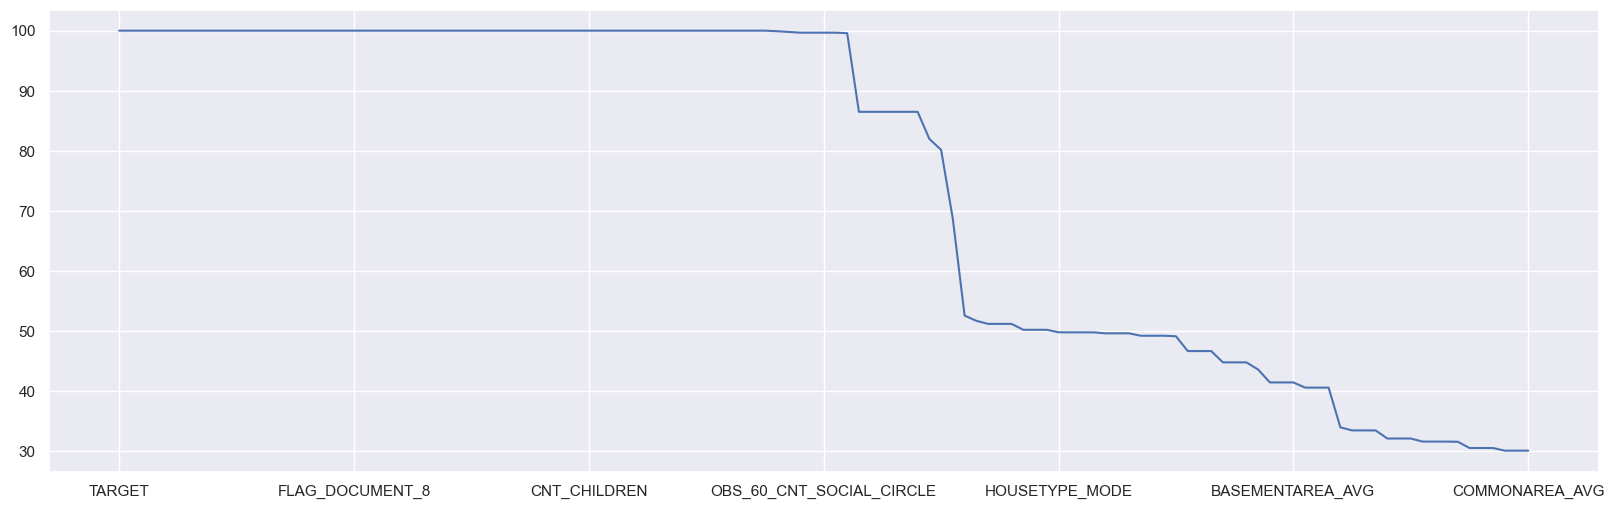

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(20, 6))
compute_nb_mising_values(df)['Taux de valeurs non nulles'].plot(ax= axes)

In [31]:
# Remplacement de NA des variable catégorielle par Xna
df_cleaned = df.copy()
for x in ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','NAME_TYPE_SUITE','OCCUPATION_TYPE','ORGANIZATION_TYPE']: df_cleaned[x].loc[df_cleaned[x].isna()]='XNA'

In [32]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [33]:
nbColsupp = len(drop_NA_columns(df_cleaned,p=0.22))
print(drop_NA_columns(df_cleaned,p=0.20),'\n\n Au total cela représente', nbColsupp, 
      'colonnes. Soit {:.2%} du nombre de colonnes total'.format(nbColsupp/len(df.columns))
     )

del nbColsupp

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TO

#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de 20% des valeurs sont manquantes </font></div>

In [34]:
col_to_drop = drop_NA_columns(df_cleaned,p=0.22).tolist()

#col_to_drop.remove("OCCUPATION_TYPE") 
col_to_drop.extend(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"])
df_cleaned.shape

(307507, 121)

In [35]:
df_cleaned = df_cleaned.drop(columns=col_to_drop,inplace=False)
df_cleaned.shape

(307507, 72)

In [36]:
import joblib
joblib.dump(df_cleaned.columns.tolist(),'data/cleaned/list_col_to_keep_from_train_application.joblib')

['data/cleaned/list_col_to_keep_from_train_application.joblib']

In [37]:
col_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTAT

Some ERRORS when visualization!!!


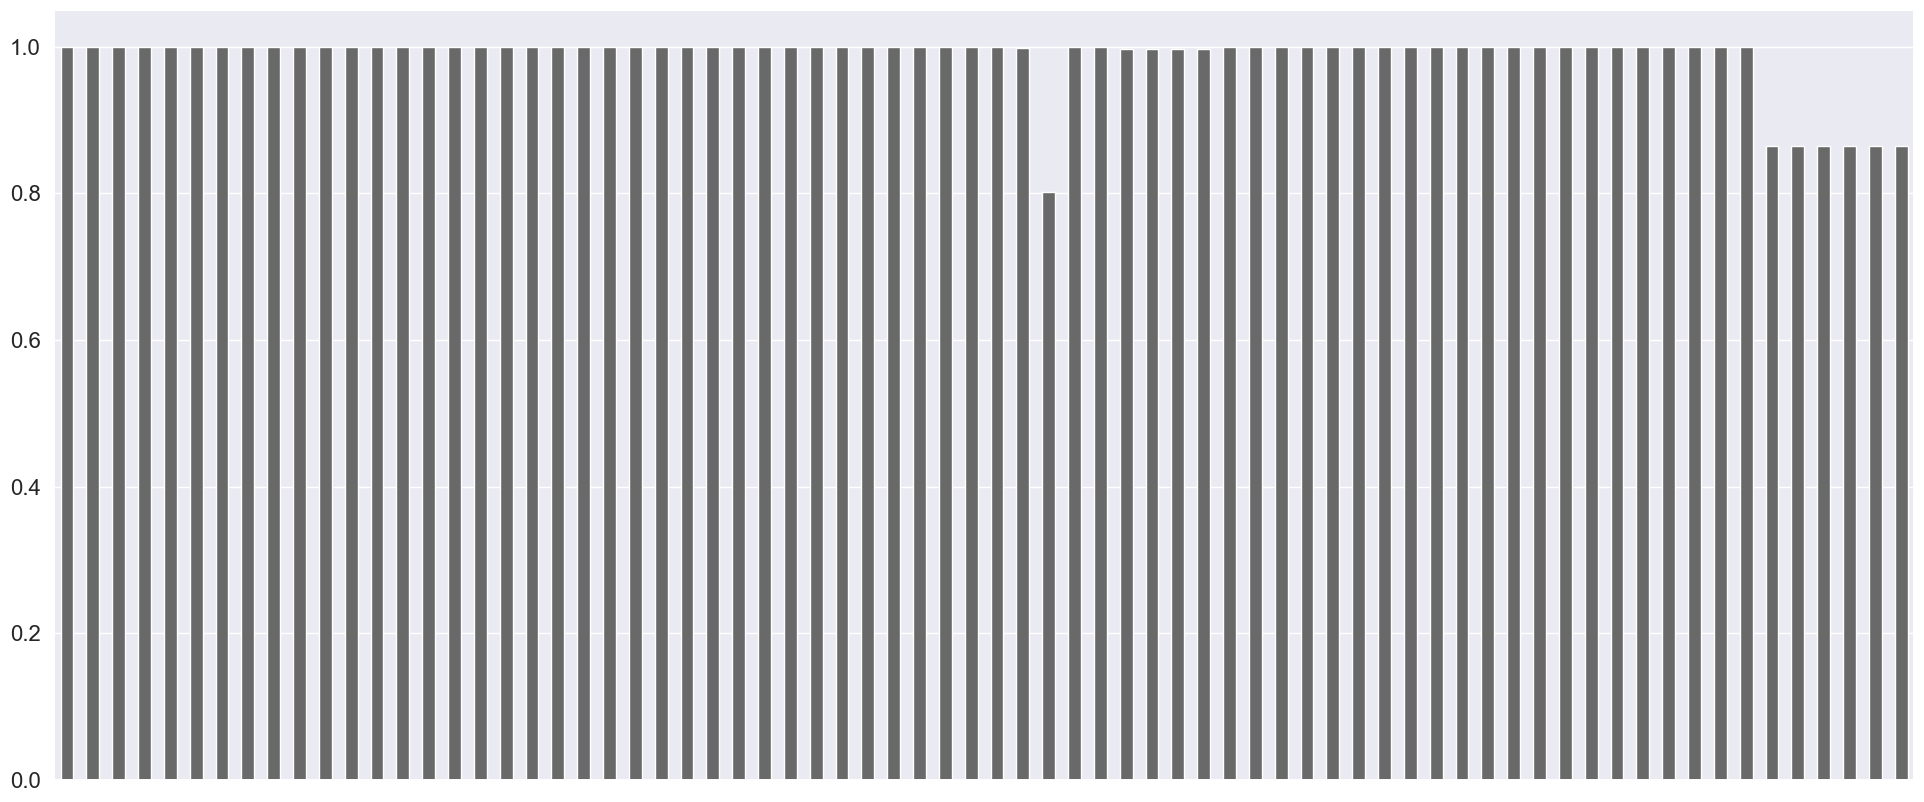

In [38]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df_cleaned);
except:
    print('Some ERRORS when visualization!!!')

### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [39]:
# variables numeriques
df_cleaned.filter(df.columns[~df.columns.isin(var_discret)]).describe()

TARGET  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307507.00000      3.075070e+05  3.075070e+05  307495.000000   
mean        0.08073      1.687977e+05  5.990286e+05   27108.666786   
std         0.27242      2.371246e+05  4.024926e+05   14493.798379   
min         0.00000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.00000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.00000      1.471500e+05  5.135310e+05   24903.000000   
75%         0.00000      2.025000e+05  8.086500e+05   34596.000000   
max         1.00000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072290e+05               307507.000000  307507.000000   
mean      5.383977e+05                    0.020868  -16037.027271   
std       3.694472e+05                    0.013831    4363.982424   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307507.000000      307507.000000    307507.000000  3.068470e+05   
mean    63815.929208       -4986.131376     -2994.201670  5.143918e-01   
std    141276.472519        3522.883030      1509.454566  1.910603e-01   
min    -17912.000000      -24672.000000     -7197.000000  8.173617e-08   
25%     -2760.000000       -7479.500000     -4299.000000  3.924574e-01   
50%     -1213.000000       -4504.000000     -3254.000000  5.659614e-01   
75%      -289.000000       -2010.000000     -1720.000000  6.636171e-01   
max    365243.000000           0.000000         0.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count  246542.000000             306486.000000             306486.000000   
mean        0.510856                  1.422209                  1.405255   
std         0.194843                  2.400931                  2.379744   
min         0.000527                  0.000000                  0.000000   
25%         0.370650                  0.000000                  0.000000   
50%         0.535276                  0.000000                  0.000000   
75%         0.669057                  2.000000                  2.000000   
max         0.896010                348.000000                344.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_MON  \
count           307506.000000              265988.000000   
mean              -962.860546                   0.267388   
std                826.811491                   0.915994   
min              -4292.000000                   0.000000   
25%              -1570.000000                   0.000000   
50%               -757.000000                   0.000000   
75%               -274.000000                   0.000000   
max                  0.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               265988.000000  
mean                     1.899950  
std                      1.869286  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

In [40]:
# variables catégorielles
df_cleaned.describe(exclude = [np.number]) #/include = [objet]/["category"]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307507      307507       307507          307507   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202922          213308   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           307507           307507                         307507   
unique               8                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248523           158771                         218389   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307507             307507          307507   
unique                  6                  6              19   
top               Married  House / apartment             XNA   
freq               196429             272865           96389   

             ORGANIZATION_TYPE FONDKAPREMONT_MODE HOUSETYPE_MODE  
count                   307507             307507         307507  
unique                      58                  5              4  
top     Business Entity Type 3                XNA            XNA  
freq                     67992             210293         154296

In [41]:
# variables discretes
df_cleaned[set(var_discret).intersection(df_cleaned.columns)]\
.astype(object).describe() #/include = [objet]/["category"]

CNT_FAM_MEMBERS  DEF_30_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
count          307505.0                  306486.0           307507   
unique             17.0                      10.0                2   
top                 2.0                       0.0                0   
freq           158355.0                  271322.0           307494   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_15  FLAG_CONT_MOBILE  \
count            307507            307507            307507   
unique                2                 2                 2   
top                   0                 0                 1   
freq             280429            307135            306933   

        LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION  \
count                    307507                       307507   
unique                        2                            2   
top                           0                            0   
freq                     252292                       295004   

        FLAG_DOCUMENT_11  REG_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT  \
count             307507                      307507                307507   
unique                 2                           2                     3   
top                    0                           0                     2   
freq              306304                      291895                226981   

        AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_13  FLAG_DOCUMENT_17  \
count                     265988.0            307507            307507   
unique                         5.0                 2                 2   
top                            0.0                 0                 0   
freq                      264362.0            306423            307425   

        FLAG_MOBIL  FLAG_DOCUMENT_7  REGION_RATING_CLIENT_W_CITY  \
count       307507           307507                       307507   
unique           2                2                            3   
top              1                0                            2   
freq        307506           307448                       229481   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_16  REG_REGION_NOT_LIVE_REGION  \
count            307507            307507                      307507   
unique                2                 2                           2   
top                   1                 0                           0   
freq             218340            304454                      302850   

        FLAG_EMP_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_9  FLAG_PHONE  \
count           307507      307507           307507      307507   
unique               2           2                2           2   
top                  1           0                0           0   
freq            252121      290065           306309      221080   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_8  CNT_CHILDREN  FLAG_DOCUMENT_19  \
count             307507           307507        307507            307507   
unique                 2                2            15                 2   
top                    0                0             0                 0   
freq              307505           282483        215369            307324   

        DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_WEEK  FLAG_WORK_PHONE  \
count                   306486.0                    265988.0           307507   
unique                       9.0                         9.0                2   
top                          0.0                         0.0                0   
freq                    280719.0                    257452.0           246203   

        AMT_REQ_CREDIT_BUREAU_DAY  FLAG_DOCUMENT_4  REG_CITY_NOT_LIVE_CITY  \
count                    265988.0           307507                  307507   
unique                        9.0                2                       2   
top                           0.0                0                       0   
freq                     264499.0           307482                  283468   

        FLAG_DOCUMENT_14  FLAG_D

#### <font color='teal'> - 3.4.1 Data target categorielle</font>

In [42]:
pd.DataFrame({'Effectif' : df_cleaned['TARGET'].value_counts(),
              'Effectif en %' : df_cleaned['TARGET'].value_counts(normalize = True).round(2), # renvoie la distribution en %
             }
            )

Effectif  Effectif en %
0    282682           0.92
1     24825           0.08

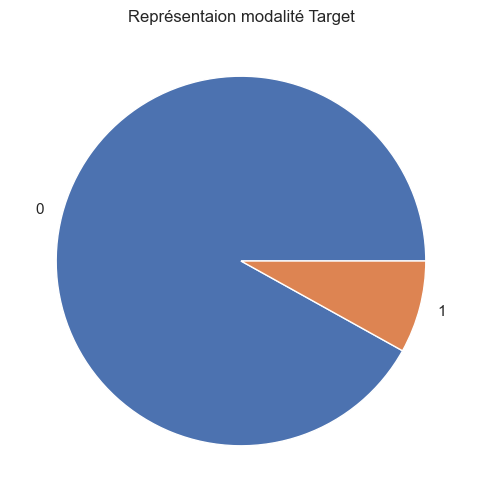

In [43]:
# diagramme en  Camembert
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(12, 6))

axes.set_title('Représentaion modalité Target')
df_cleaned['TARGET'].value_counts().plot(kind='pie',ax =  axes,label = '')
axes.xaxis.label.set_color('red')

#### <font color='teal'> - 3.4.2 Data target numerique</font>

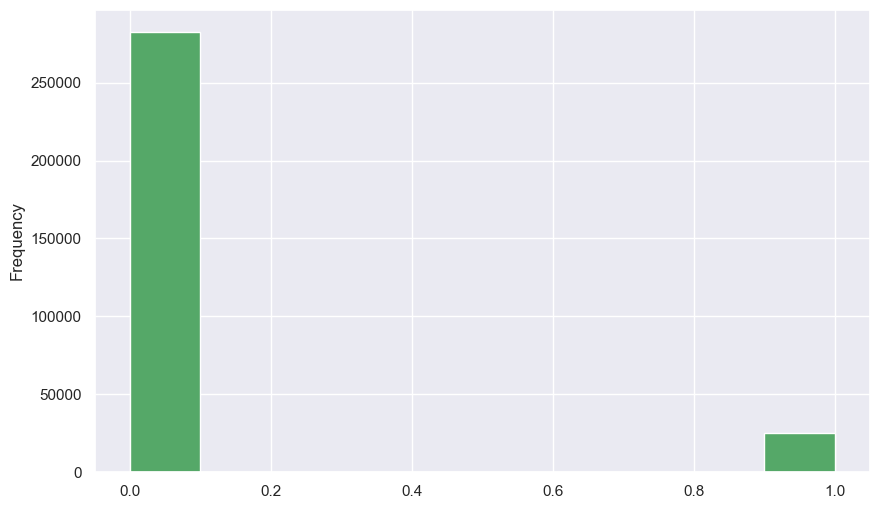

In [44]:
df_cleaned['TARGET'].astype(int).plot.hist(color = 'g');

In [45]:
df_cleaned['TARGET'].describe()

count    307507.00000
mean          0.08073
std           0.27242
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: TARGET, dtype: float64

### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

In [46]:
# Find correlations with the target and sort
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlations = df_cleaned[numeric_cols].corr()['TARGET'].sort_values(ascending=False)
#logcorrelations = df_cleaned[numeric_cols].apply(lambda x: np.log1p(x) if x.nunique()>2 else x )\
#.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(7))
print('\n\nMost Negative Correlations:\n', correlations.tail(7))

#print('\n\n\n')

# Display correlations
#print('Most Positive Correlations log features:\n', logcorrelations.head(7))
#print('\n\nMost Negative Correlations log features:\n', logcorrelations.tail(7))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078242
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
Name: TARGET, dtype: float64


Most Negative Correlations:
 FLAG_DOCUMENT_6              -0.028603
AMT_CREDIT                   -0.030371
REGION_POPULATION_RELATIVE   -0.037225
AMT_GOODS_PRICE              -0.039647
DAYS_EMPLOYED                -0.044934
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_3                 -0.178926
Name: TARGET, dtype: float64


CPU times: total: 5.58 s
Wall time: 6.24 s


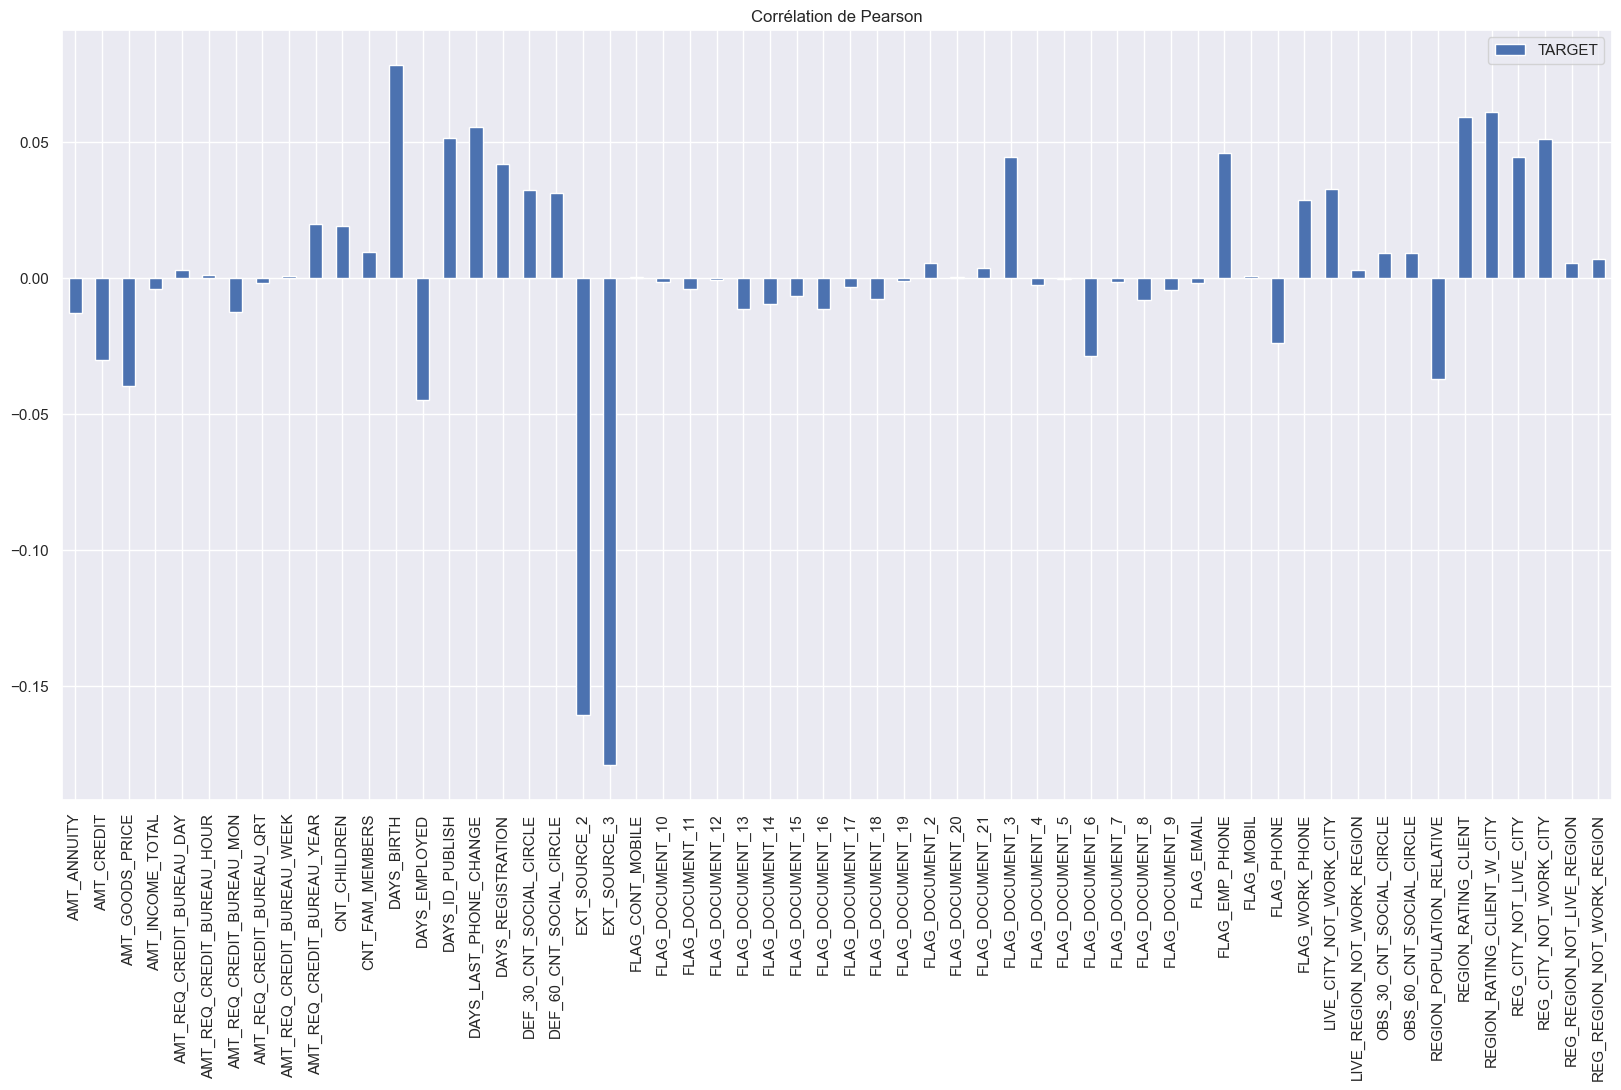

In [47]:
%%time
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1, 1, 1)
df_cleaned.corr()[['TARGET']].sort_index()\
.drop(['TARGET']).plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson");

In [48]:
# Analyse de corrélation avec target
liaison_target = pd.DataFrame({'columns' : df_cleaned.columns})

#ajout de la corrélation de pearson
liaison_target = liaison_target.merge(pd.DataFrame({'correlation':df_cleaned.corr()['TARGET']}).reset_index().rename(columns={"index": "columns"}),
                     on = 'columns')

######### Test d'indépendance (test du chi2) 2 qualitatives features
from scipy.stats import chi2_contingency
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype == 'object' ]
chi2dictpvalue = dict()
# Loop over the features and plot each one
for feature in features:
    # Test du chi2
    chi2, p_value, dof, expected = chi2_contingency(pd.crosstab( df_cleaned[feature],df_cleaned.TARGET))
    chi2dictpvalue[feature] = p_value
    #Ainsi, la p-value ici est de 0.0005 : il y a donc un lien statistique entre le sexe et la tranche salariale car la p-value est très petite.

#ajout de la pvalue du test de chi2
liaison_target = liaison_target.merge(pd.DataFrame({'chi2_pvalue':chi2dictpvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')

######### Quali quanti
from scipy.stats import ttest_ind, mannwhitneyu

features = [i for i in df_cleaned.columns if df_cleaned[i].dtype != 'object' ]
Studentpvalue = dict()
MannWhitneypvalue = dict()
for feature in features:
    # Test du chi2
    # Supposons que vous ayez une variable qualitative 'variable_qualitative' et une variable quantitative 'variable_quantitative'
    group1 = df_cleaned[df_cleaned['TARGET'] == 0][feature]
    group2 = df_cleaned[df_cleaned['TARGET'] == 1][feature]
    
    # Test t de Student (pour les distributions normales) ou test de Mann-Whitney U (pour les distributions non normales)
    Studentpvalue[feature] = ttest_ind(group1, group2)[1]  # Test t de Student
    MannWhitneypvalue[feature] = mannwhitneyu(group1, group2)[1]  # Test de Mann-Whitney U

#ajout de la pvalue du test de student
liaison_target = liaison_target.merge(pd.DataFrame({'StudentTest':Studentpvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')
#p-value < 0.05 - différence significative avec une probabilité de 95%
#p-value < 0.01 -  différence significative avec une probabilité de 99%
#p-value < 0.001 -  différence significative avec une probabilité de 99‰

#ajout de la pvalue du test de MannWhitney
liaison_target = liaison_target.merge(pd.DataFrame({'MannWhitney':MannWhitneypvalue}).reset_index().rename(columns={"index": "columns"}),
                     how='outer',on = 'columns')
liaison_target.index = liaison_target['columns']
liaison_target.drop(columns=['columns'],inplace=True)

#liaison_target.sort_values(by = 'correlation')

In [49]:
liaison_target[['chi2_pvalue']]\
.loc[liaison_target.index !='TARGET']\
.dropna()

chi2_pvalue
columns                           
CODE_GENDER          4.394091e-202
FLAG_OWN_CAR          9.410574e-34
FLAG_OWN_REALTY       6.716542e-04
FONDKAPREMONT_MODE    9.651141e-60
HOUSETYPE_MODE       4.478764e-110
NAME_CONTRACT_TYPE    1.127500e-65
NAME_EDUCATION_TYPE  2.462768e-219
NAME_FAMILY_STATUS   7.717800e-107
NAME_HOUSING_TYPE     1.105828e-88
NAME_INCOME_TYPE     1.851917e-266
NAME_TYPE_SUITE       1.259255e-07
OCCUPATION_TYPE       0.000000e+00
ORGANIZATION_TYPE    5.234821e-299

CPU times: total: 31.2 ms
Wall time: 56.6 ms


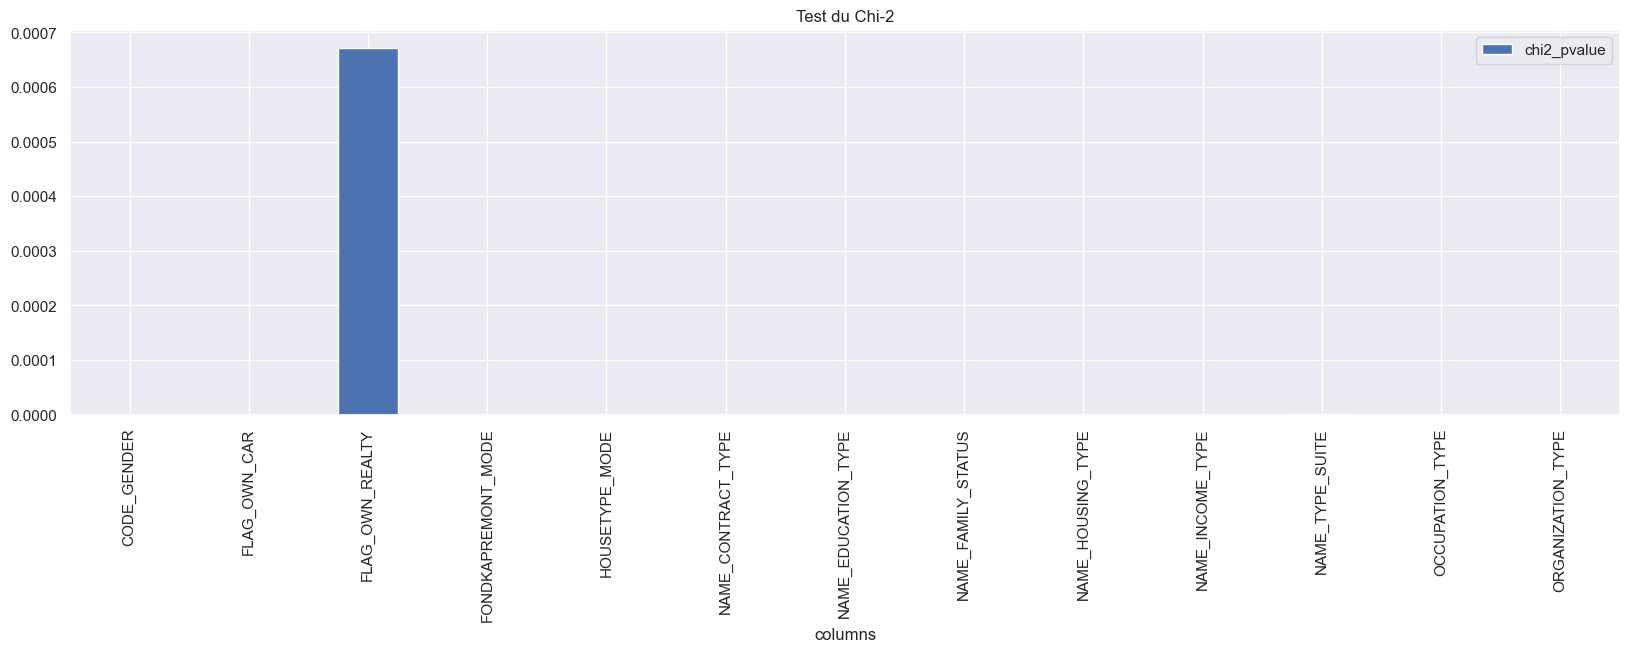

In [50]:
%%time
plt.figure(figsize=(20,5))
ax2 = plt.subplot(1, 1, 1)
liaison_target[['chi2_pvalue']]\
.loc[~liaison_target.index.isin(['TARGET']) ]\
.dropna().plot(kind='bar',ax = ax2)
ax2.set_title("Test du Chi-2");

#### <font color='teal'> - 3.5.1 Data target catégorielle</font>

In [51]:
def plot_categorical_feature(feature, df = None, orientation_horizontal = True):

    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    df1 = df1.merge(cat_perc, on=feature)
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 2 ,figsize=(15,5),sharey=True)
    sns.barplot(y = feature, x="Number of contracts",data=df1, ax= axes[0])
    sns.barplot(y = feature, x='TARGET', data=df1, ax= axes[1])
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    plt.xlabel('Fraction of loans defaulted', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

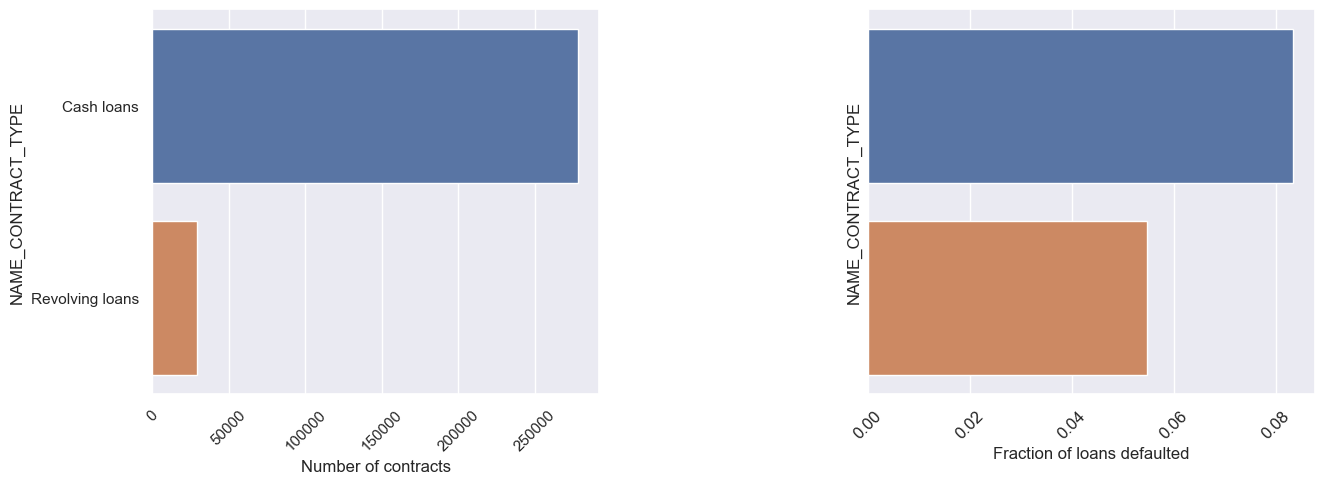

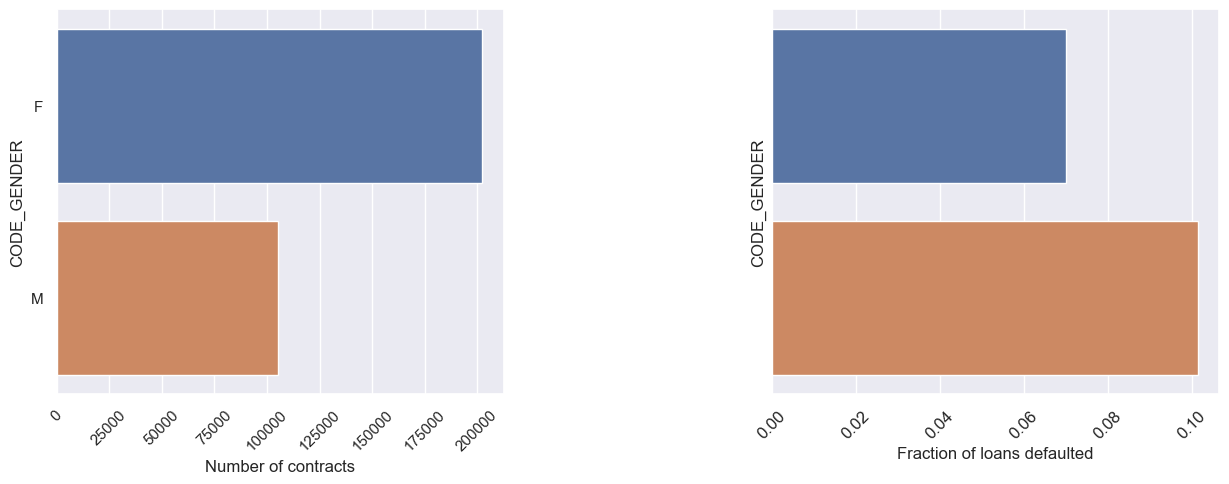

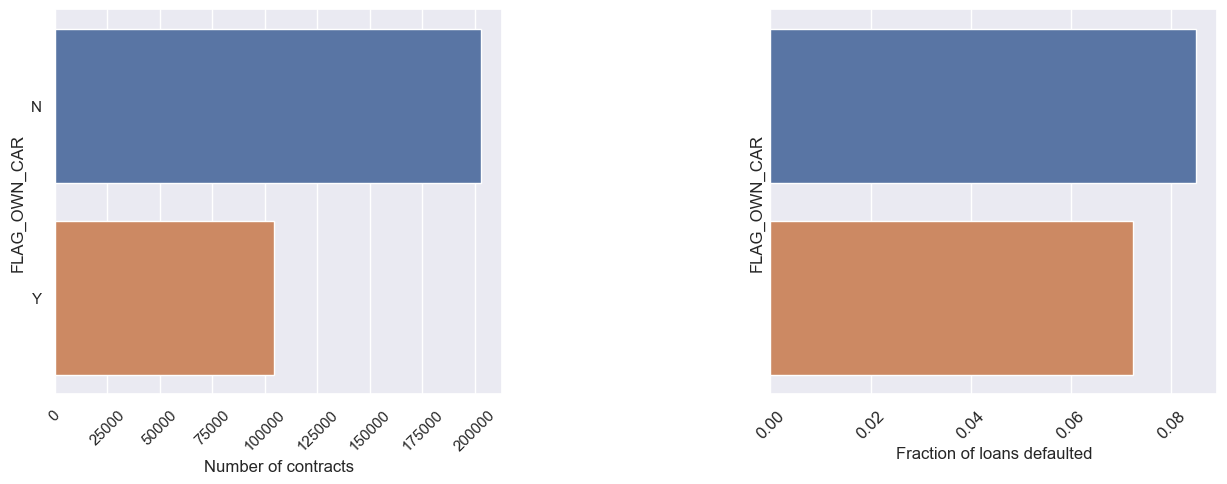

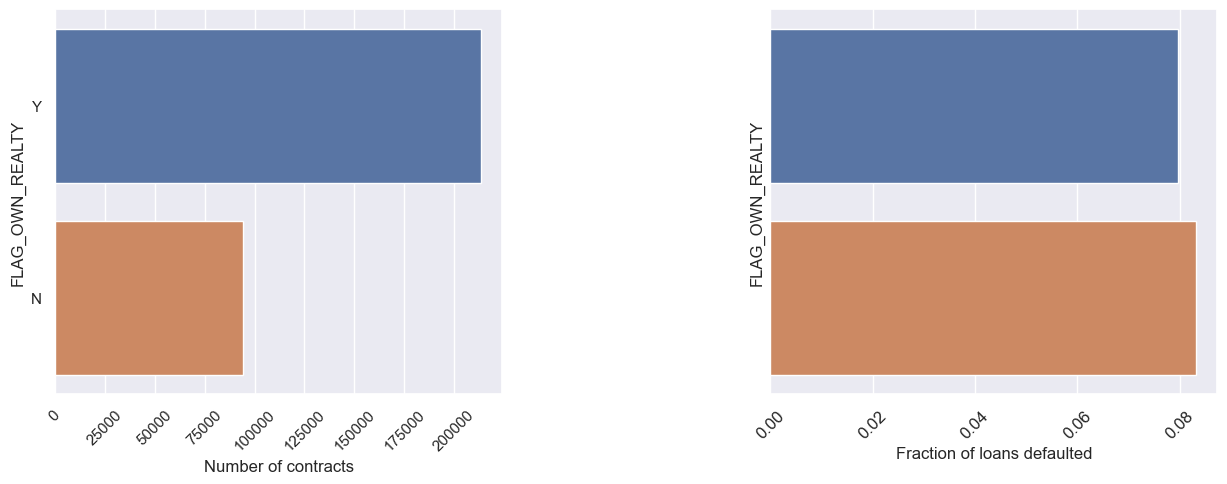

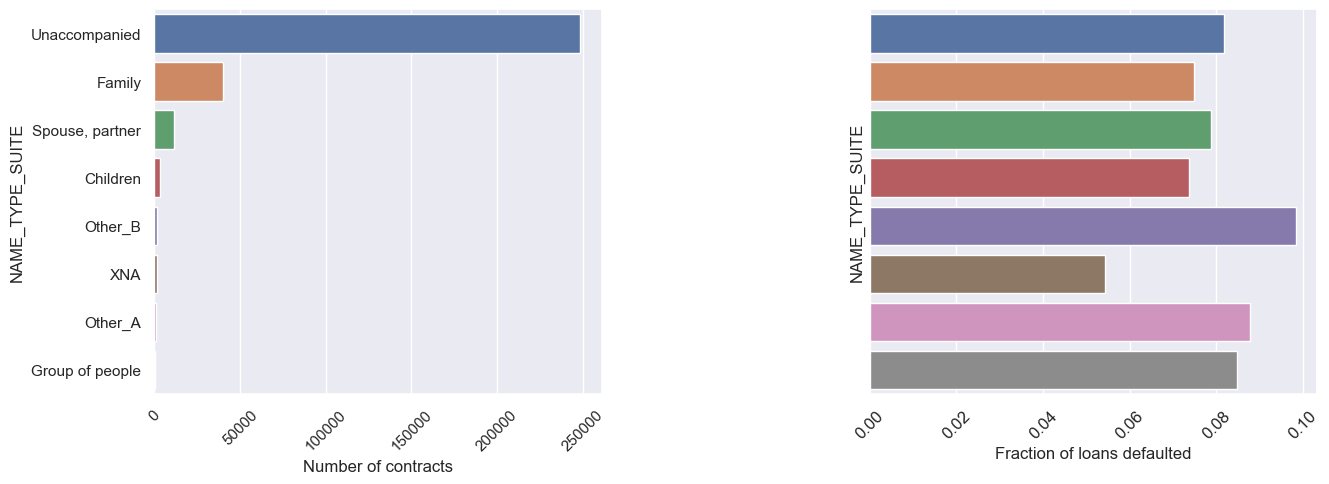

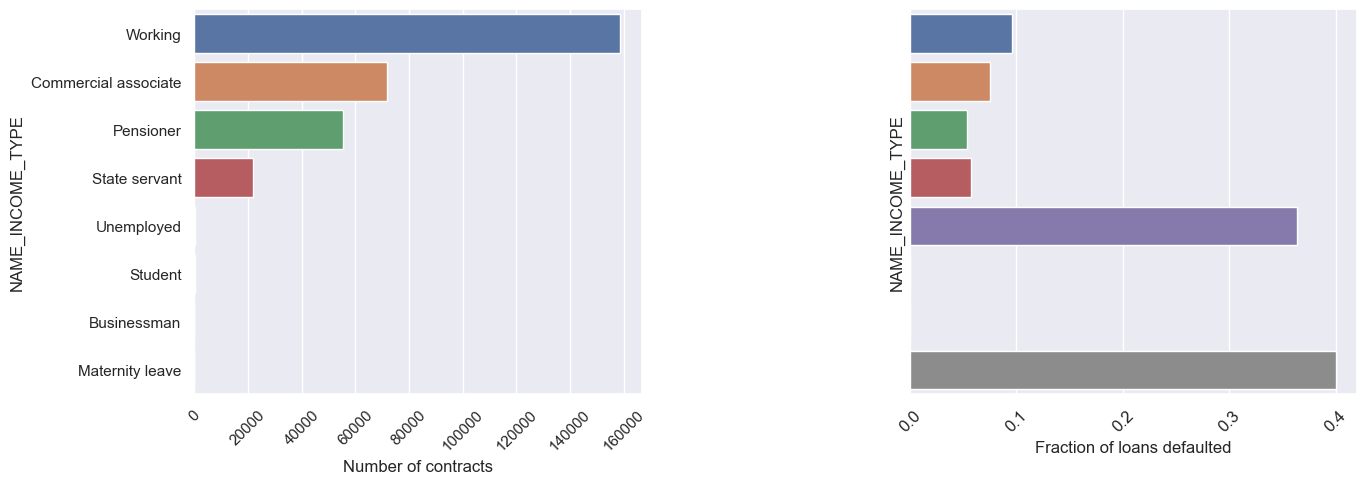

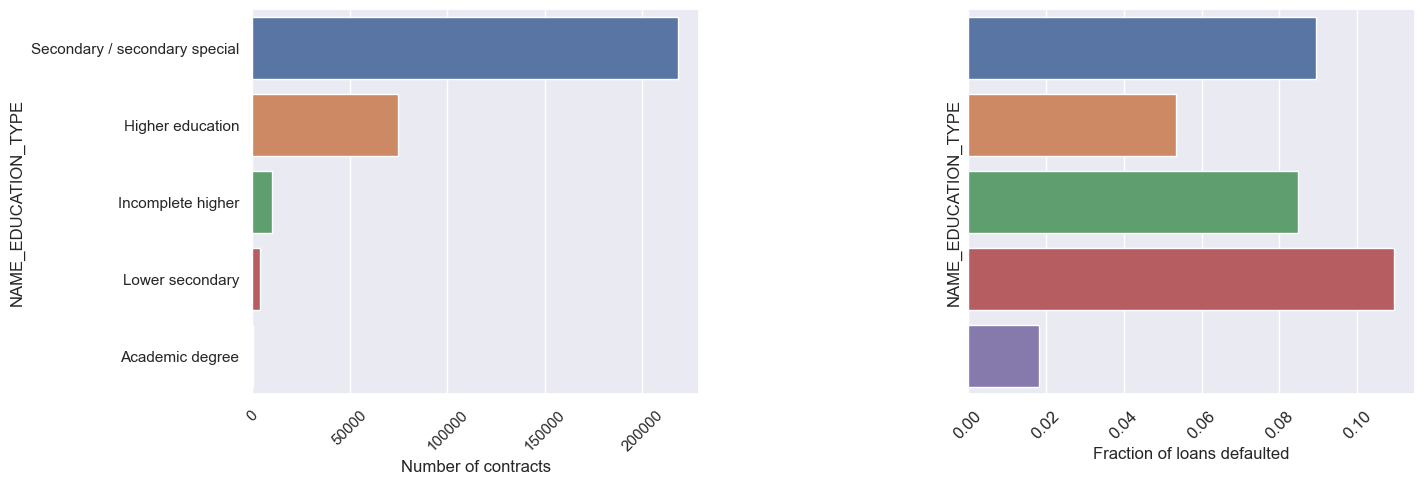

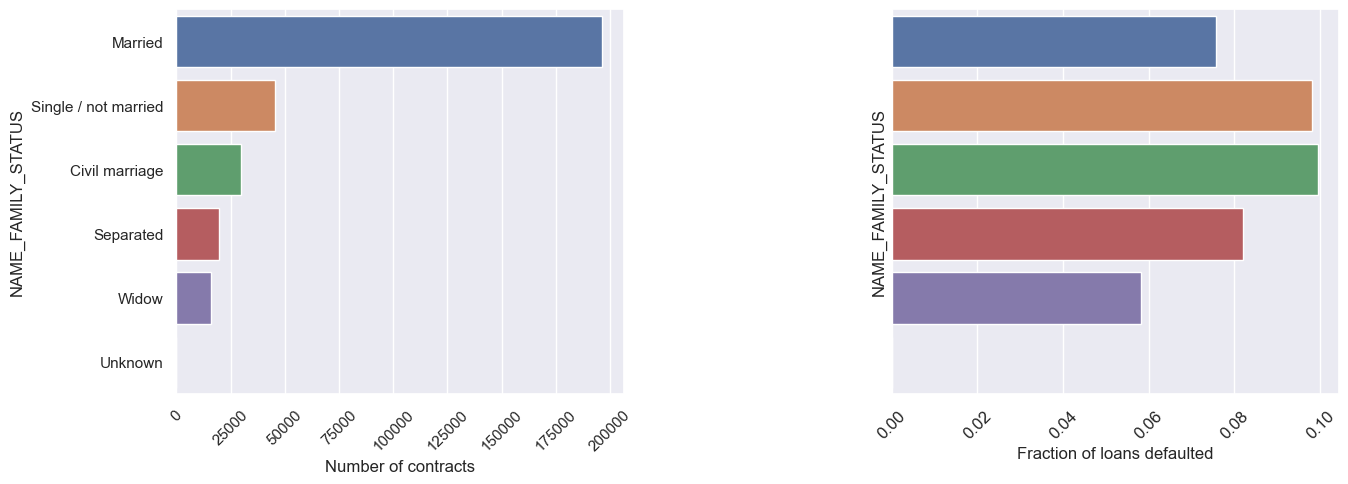

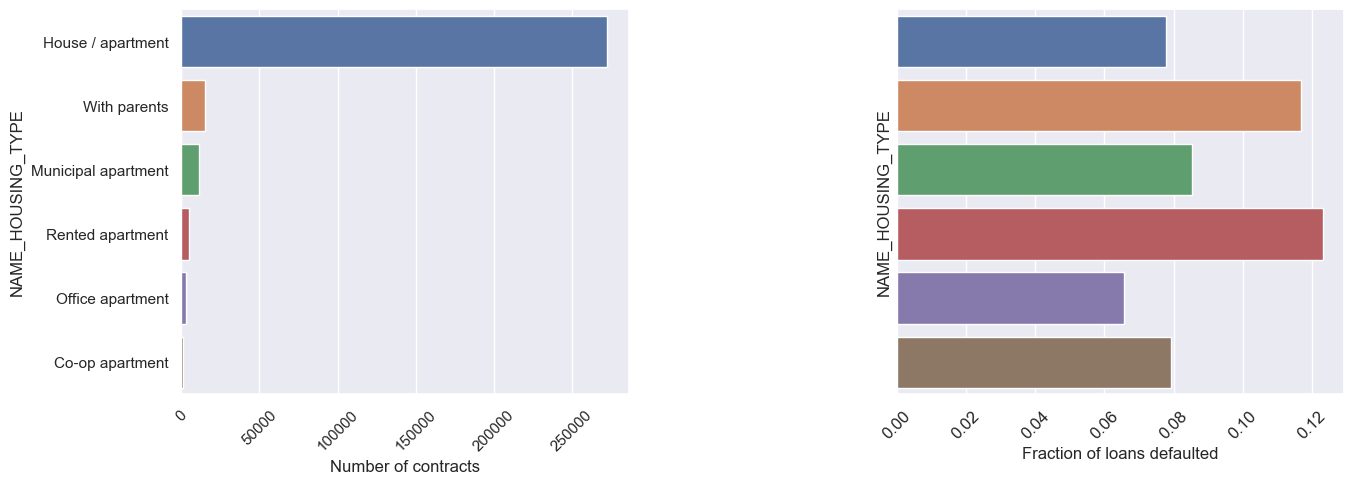

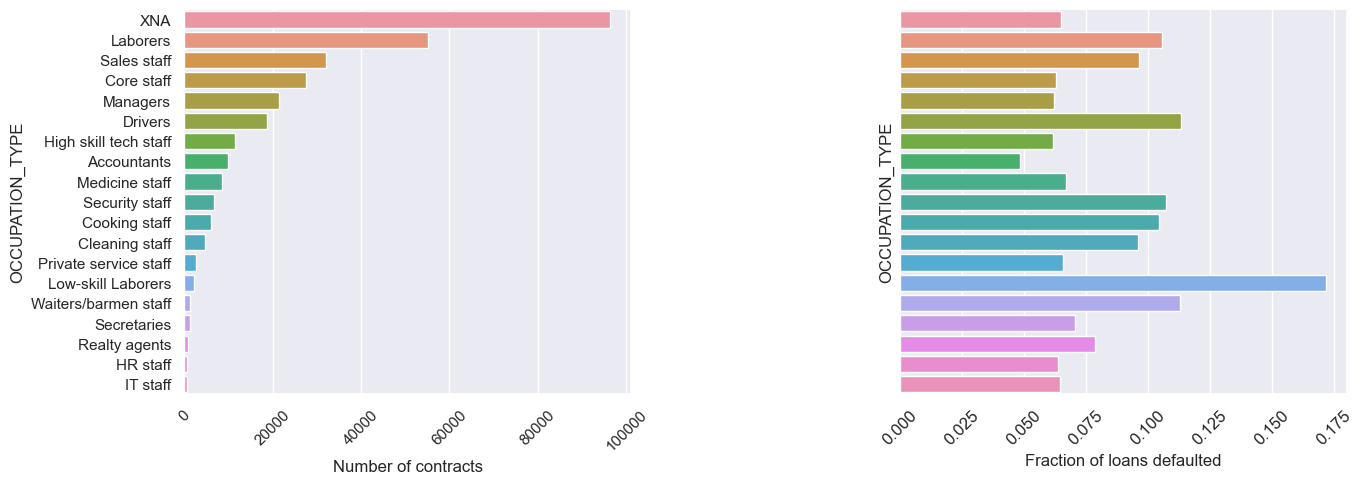

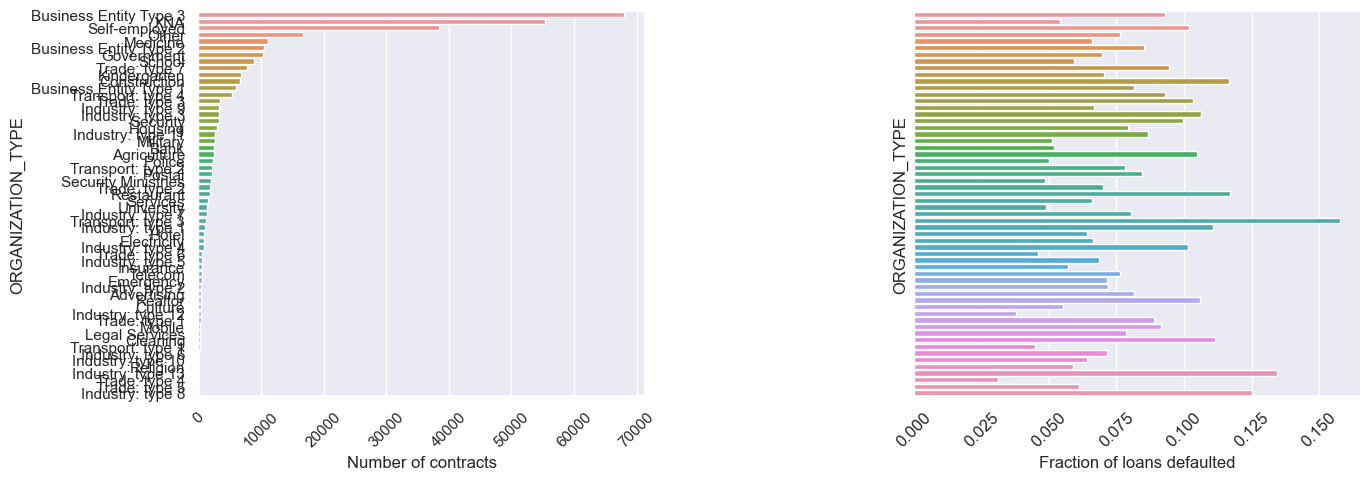

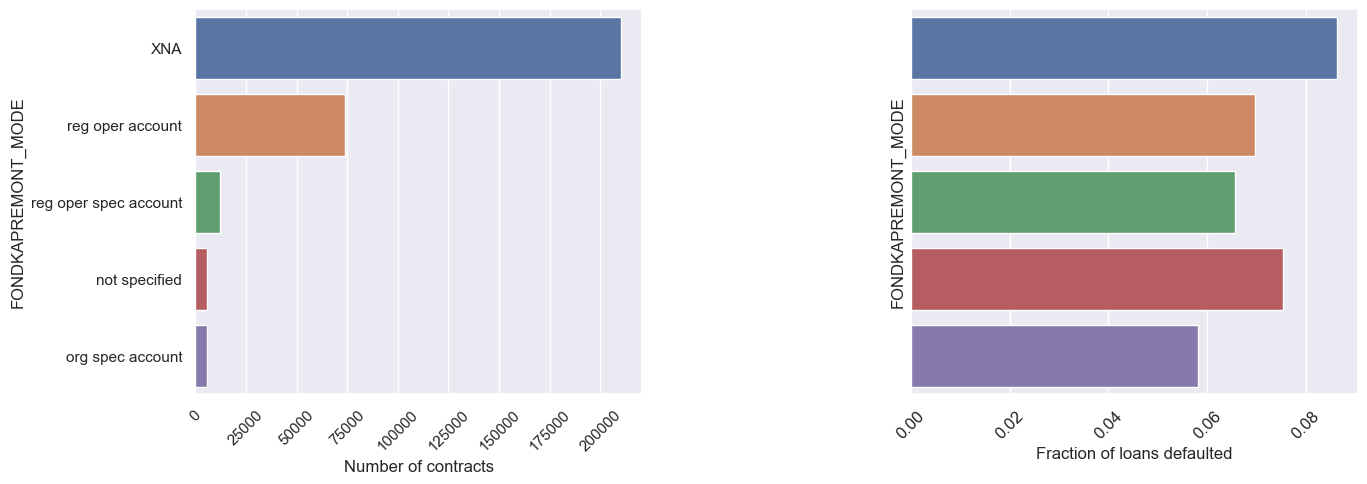

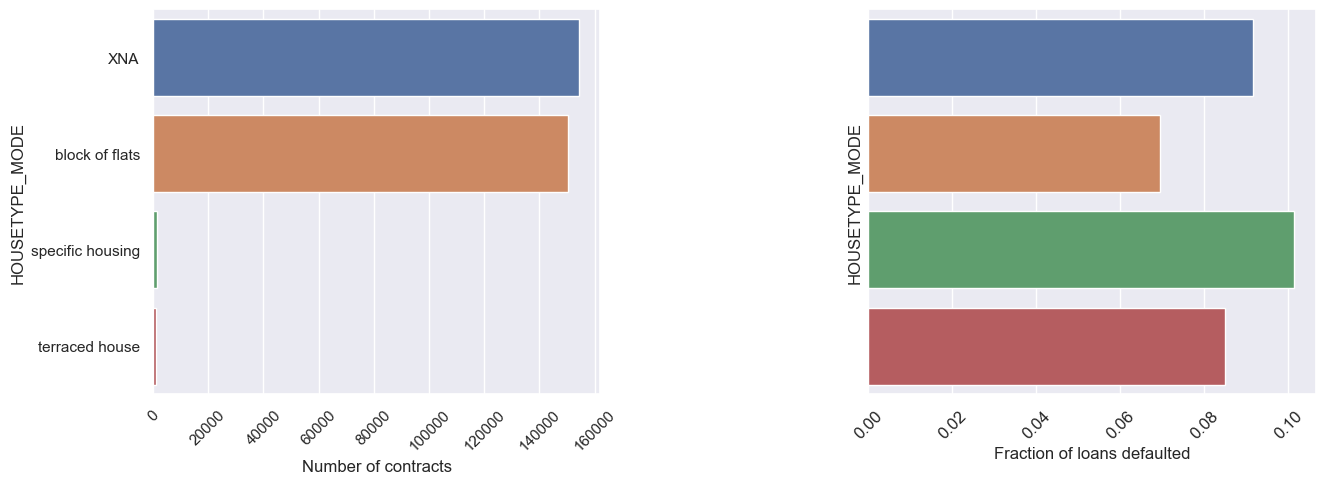

In [52]:
# Concatenate the two lists
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype == 'object' ]
#features.extend(var_discret)

# Loop over the features and plot each one
for feature in features:
    plot_categorical_feature( feature,df=df_cleaned )

In [53]:
def plot_num_feature(feature, df = None, orientation_horizontal = True):
    
    sns.set_color_codes("colorblind")
    
    fig,axes =plt.subplots(nrows = 1,ncols= 1 ,figsize=(15,5),sharey=True)
    sns.boxplot(y = feature, x="TARGET",data = df, ax = axes, showfliers=False )
    plt.xlabel('Boxplot', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

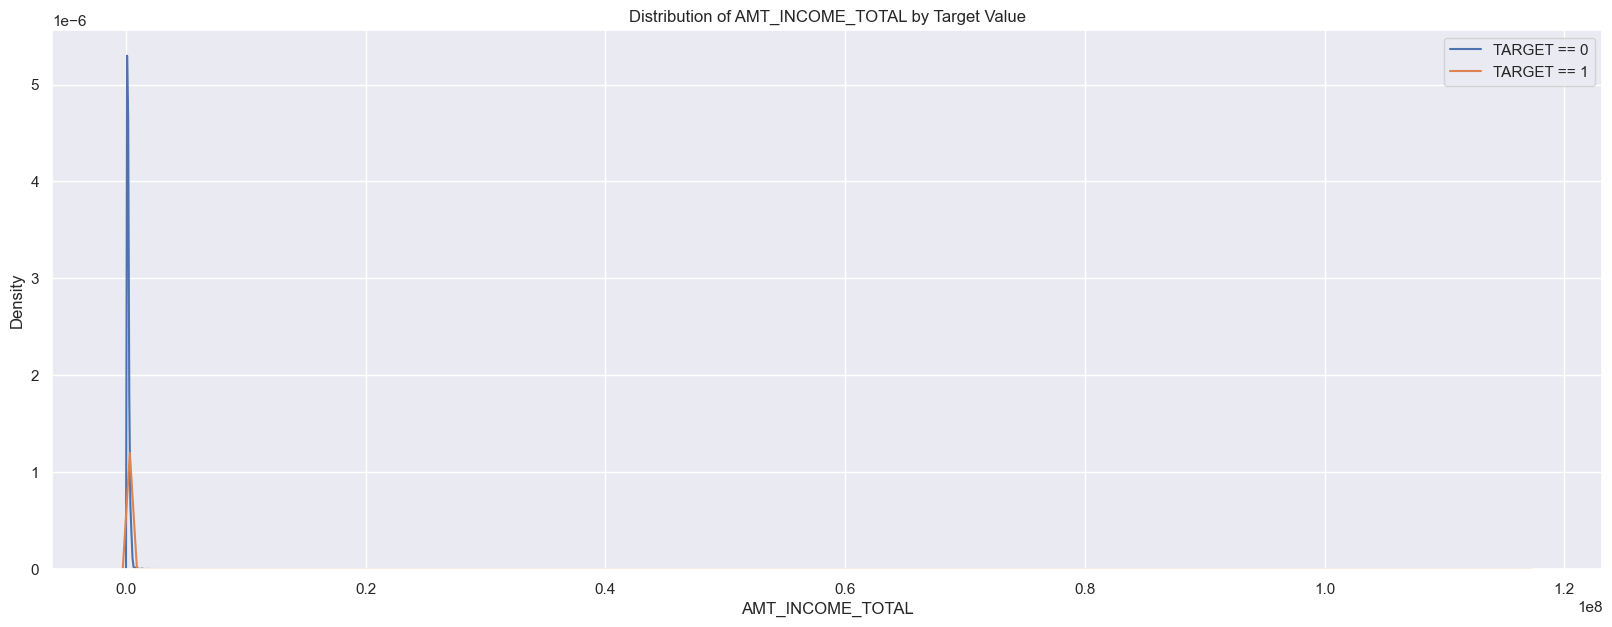

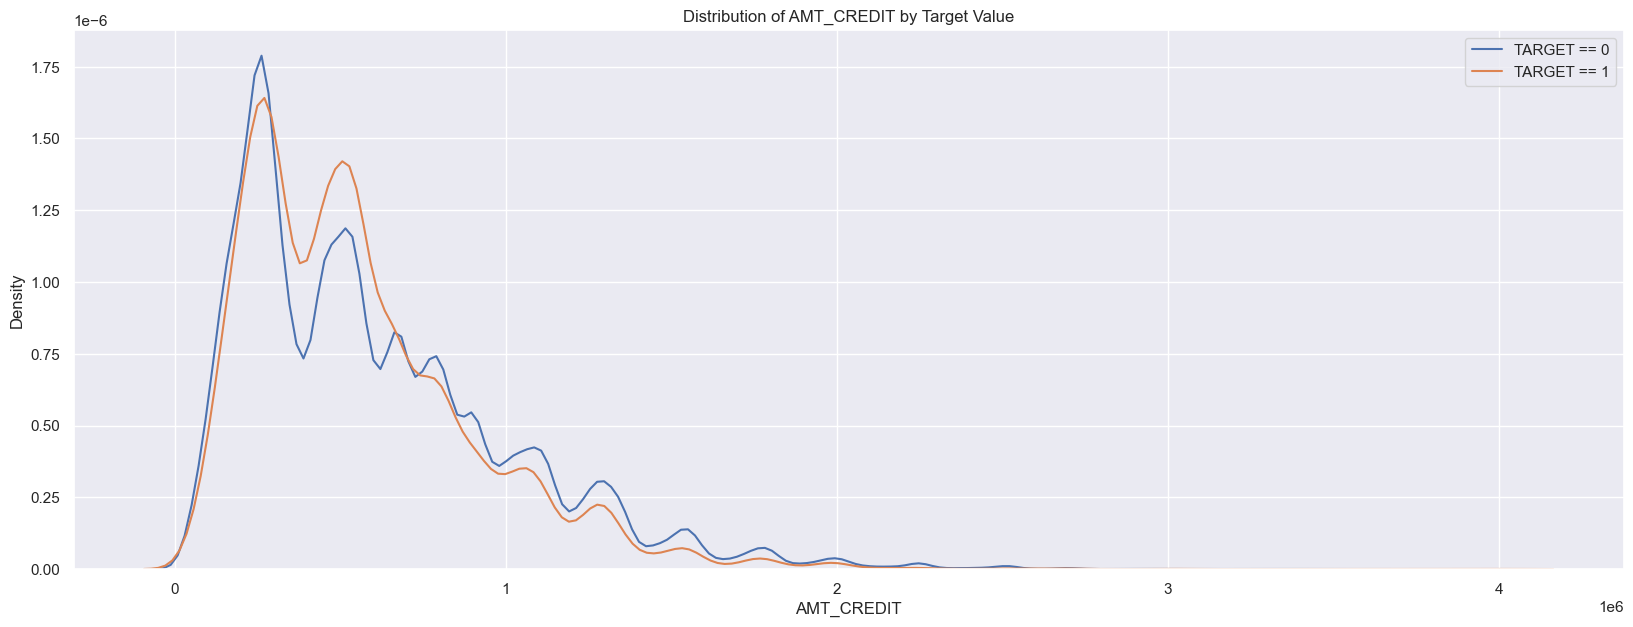

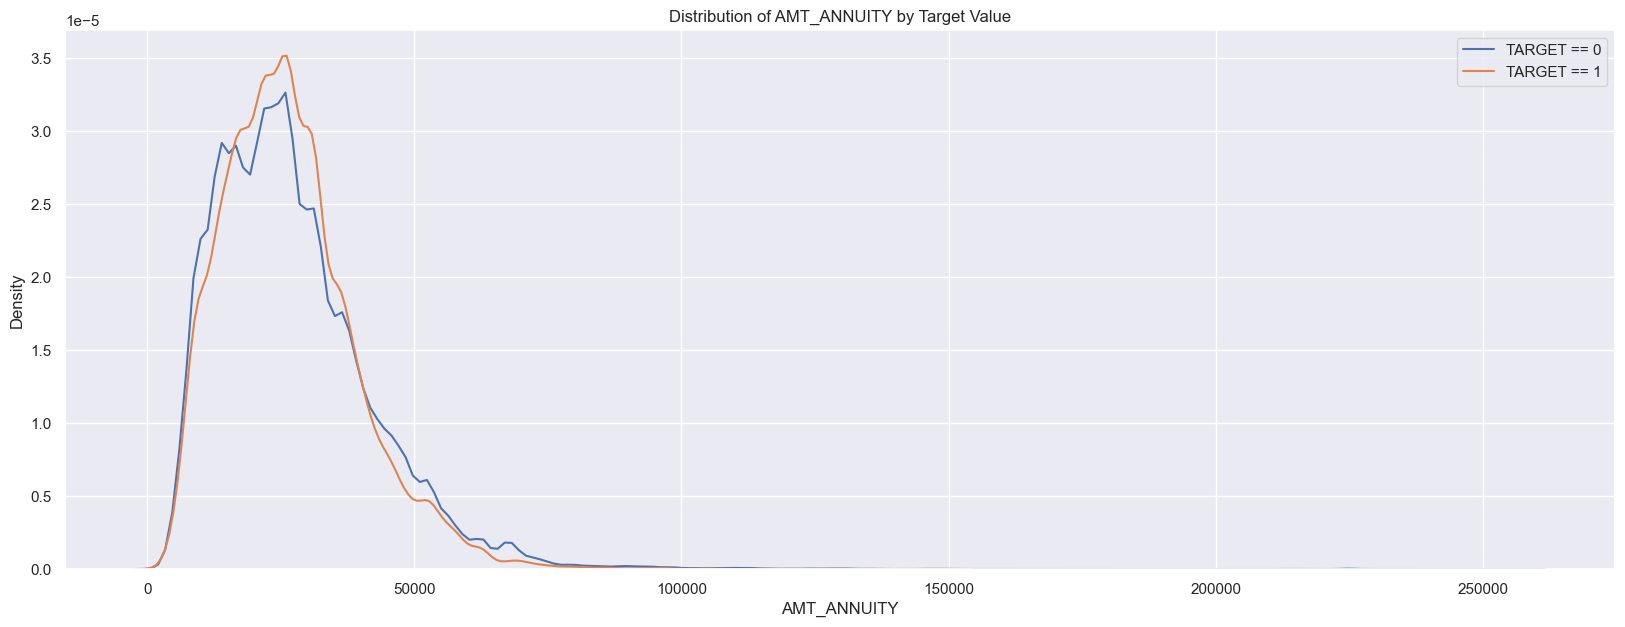

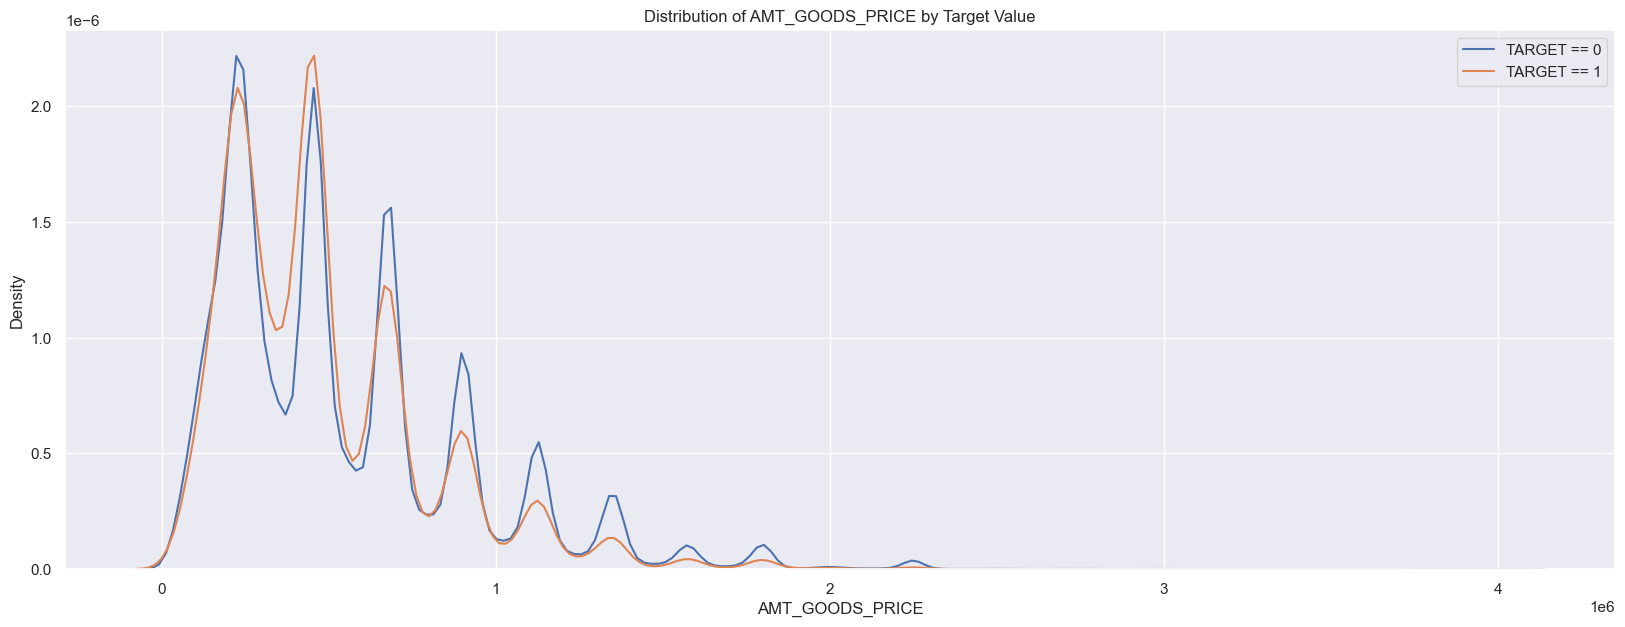

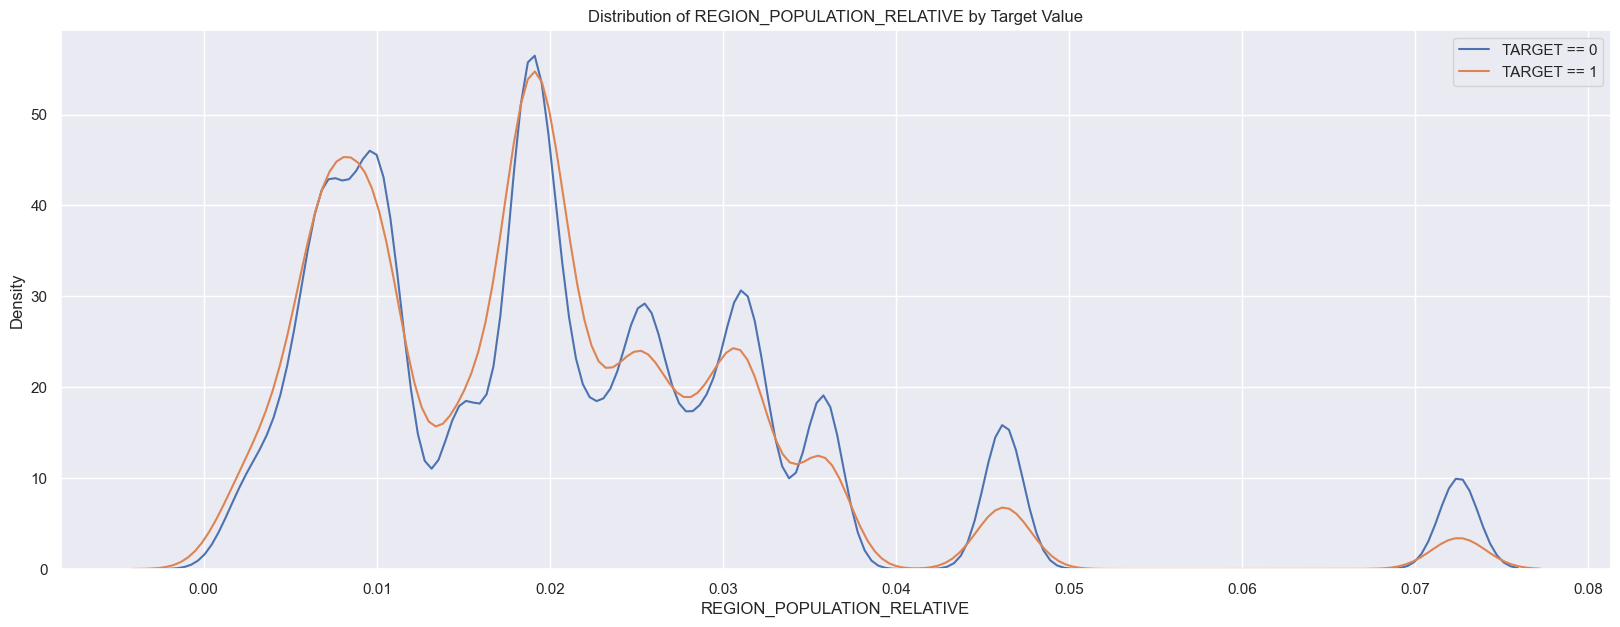

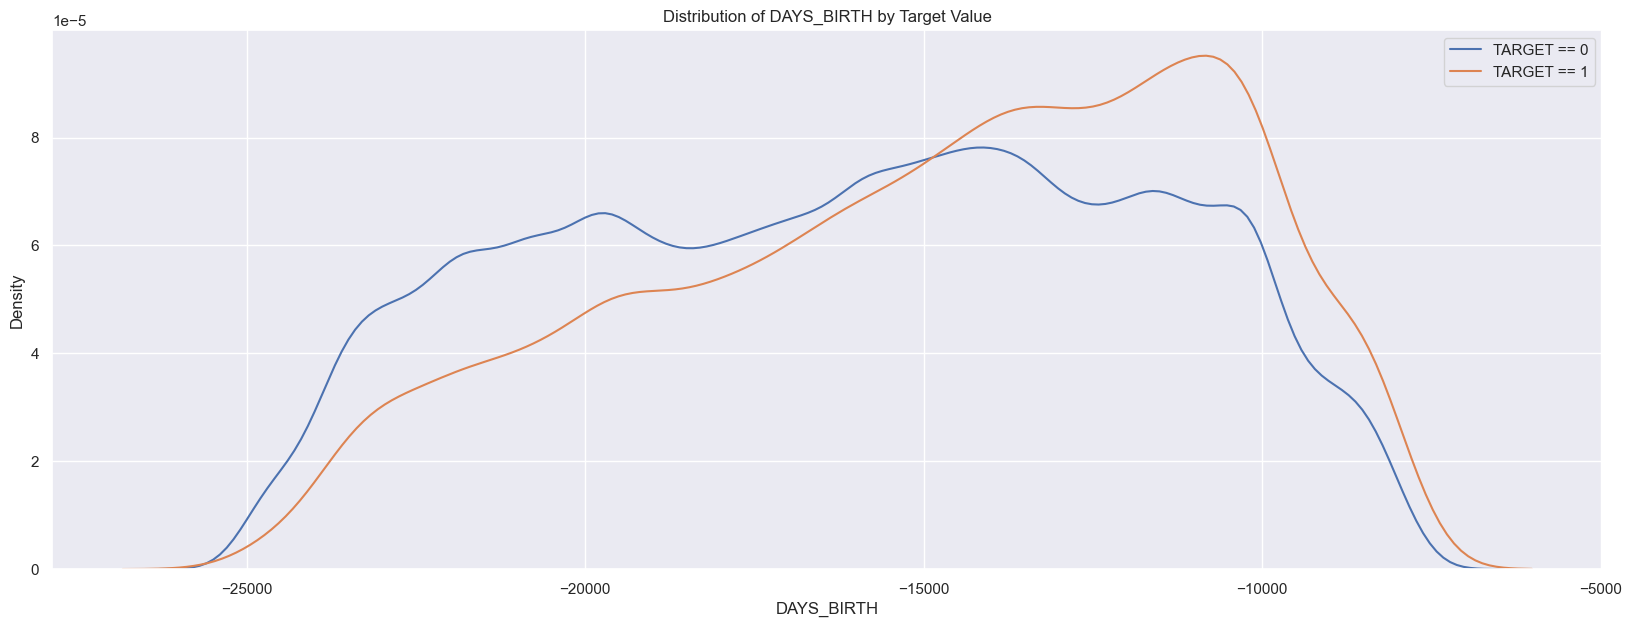

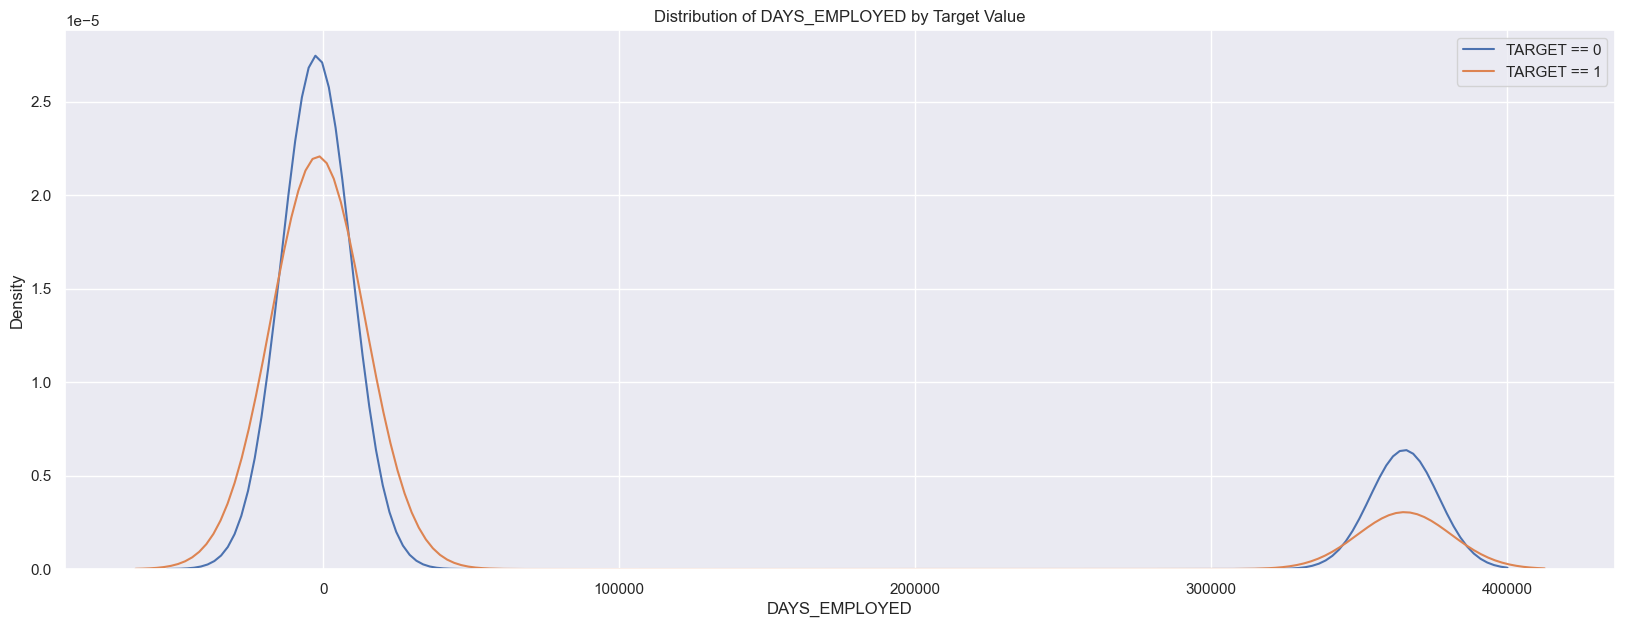

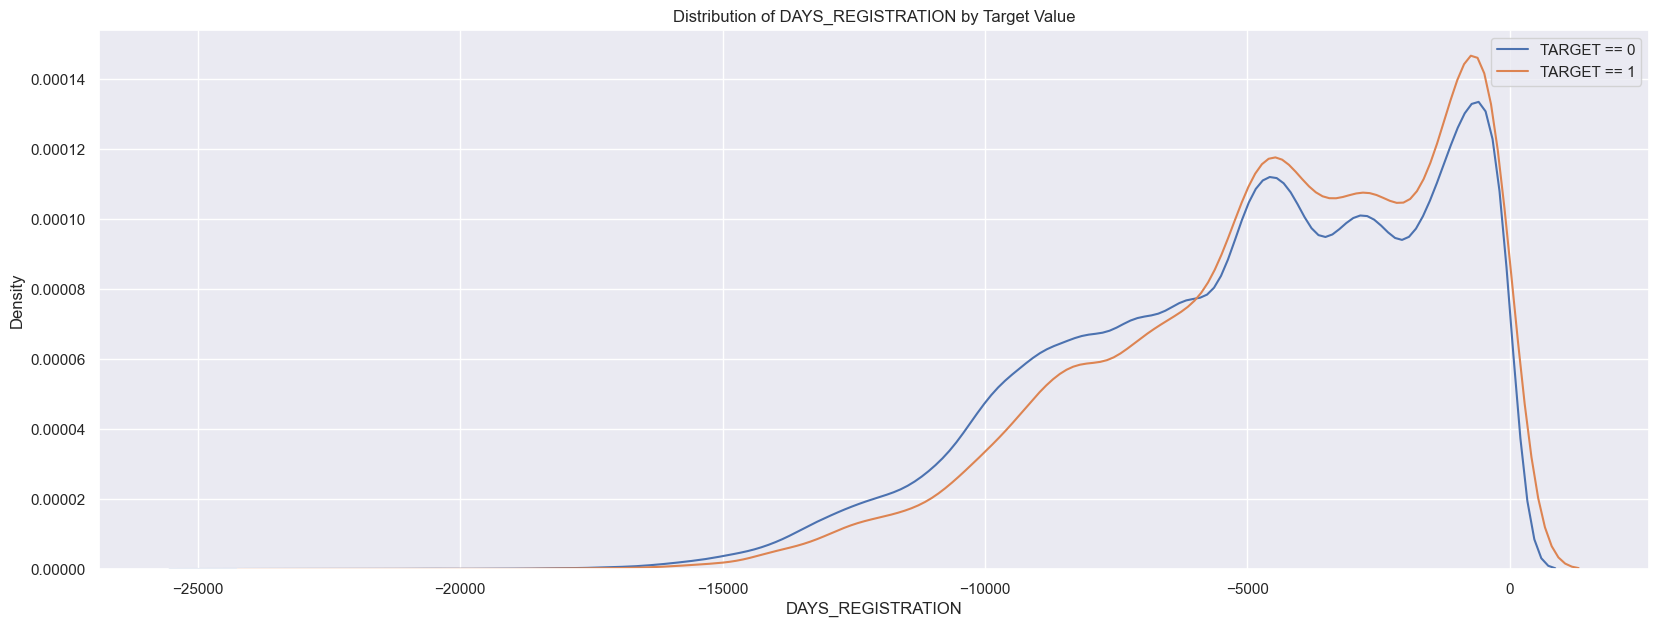

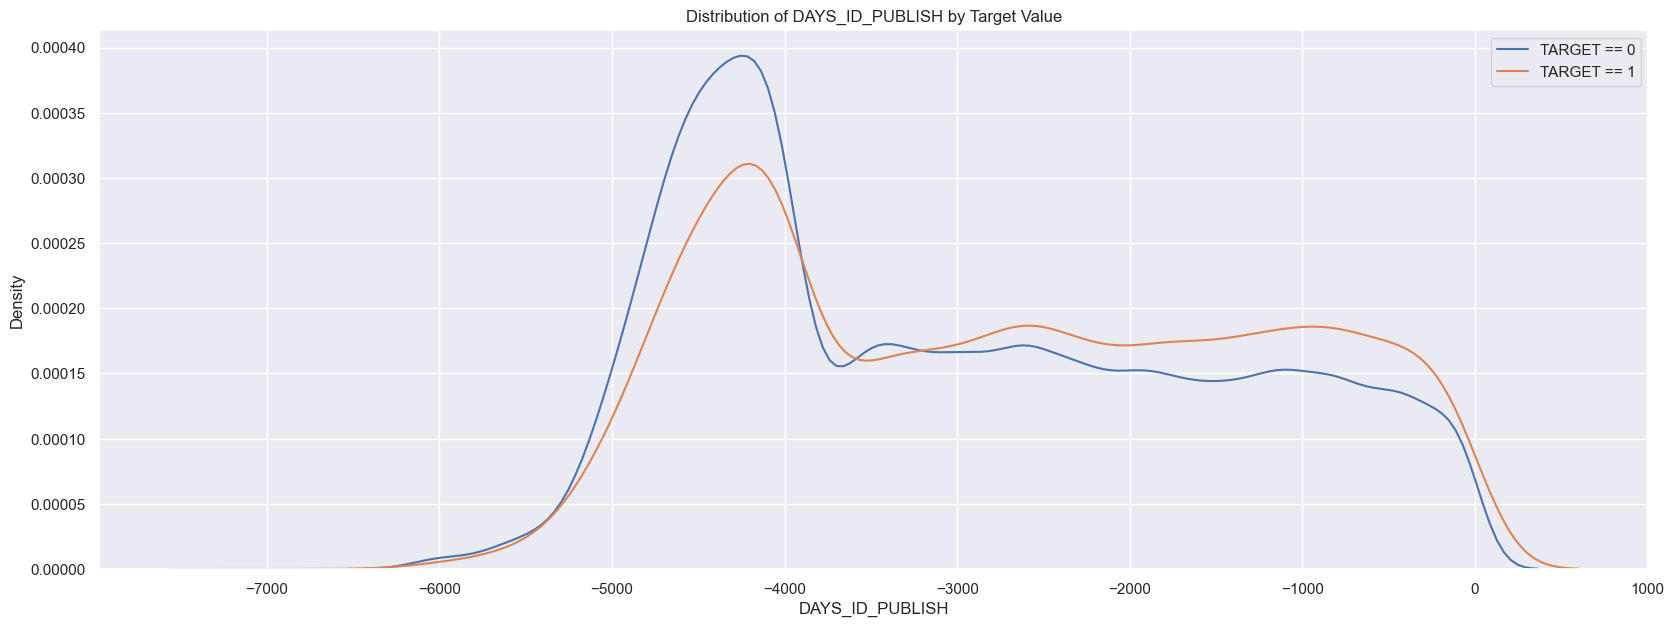

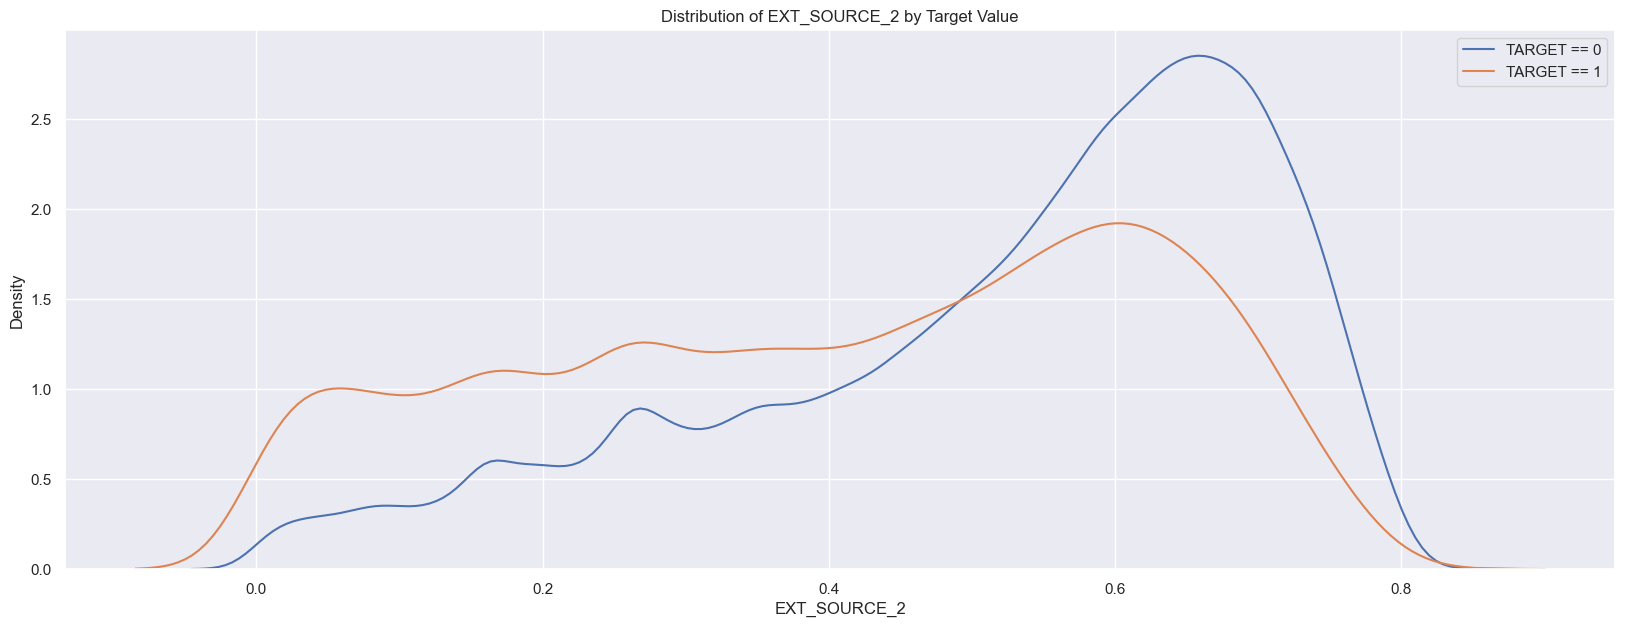

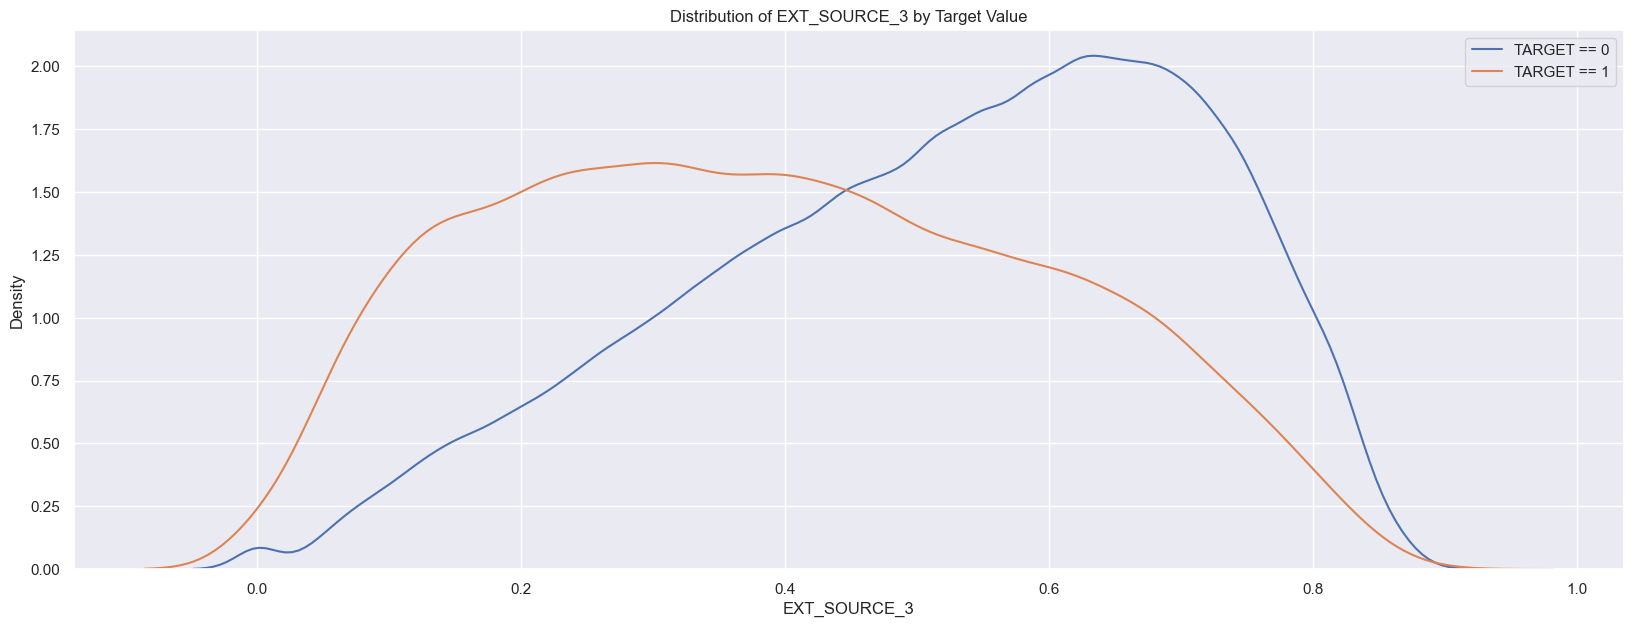

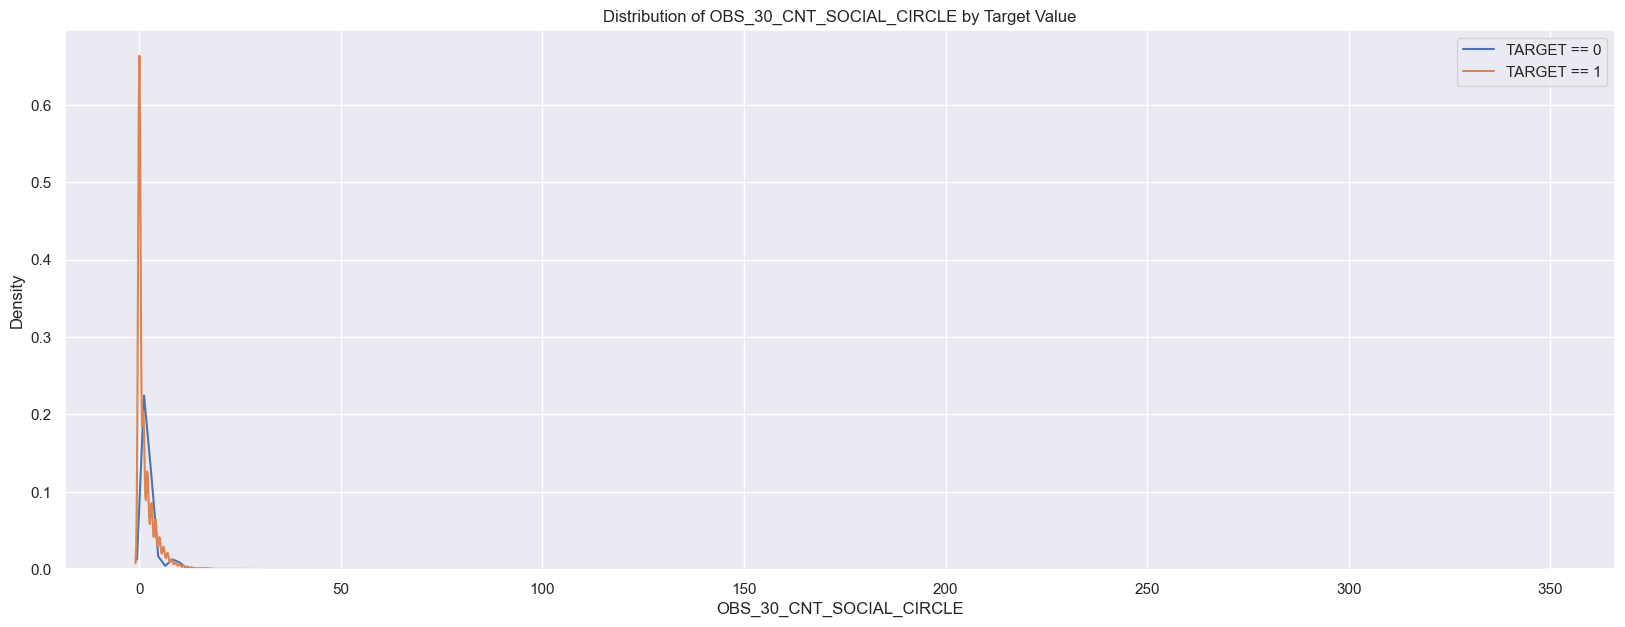

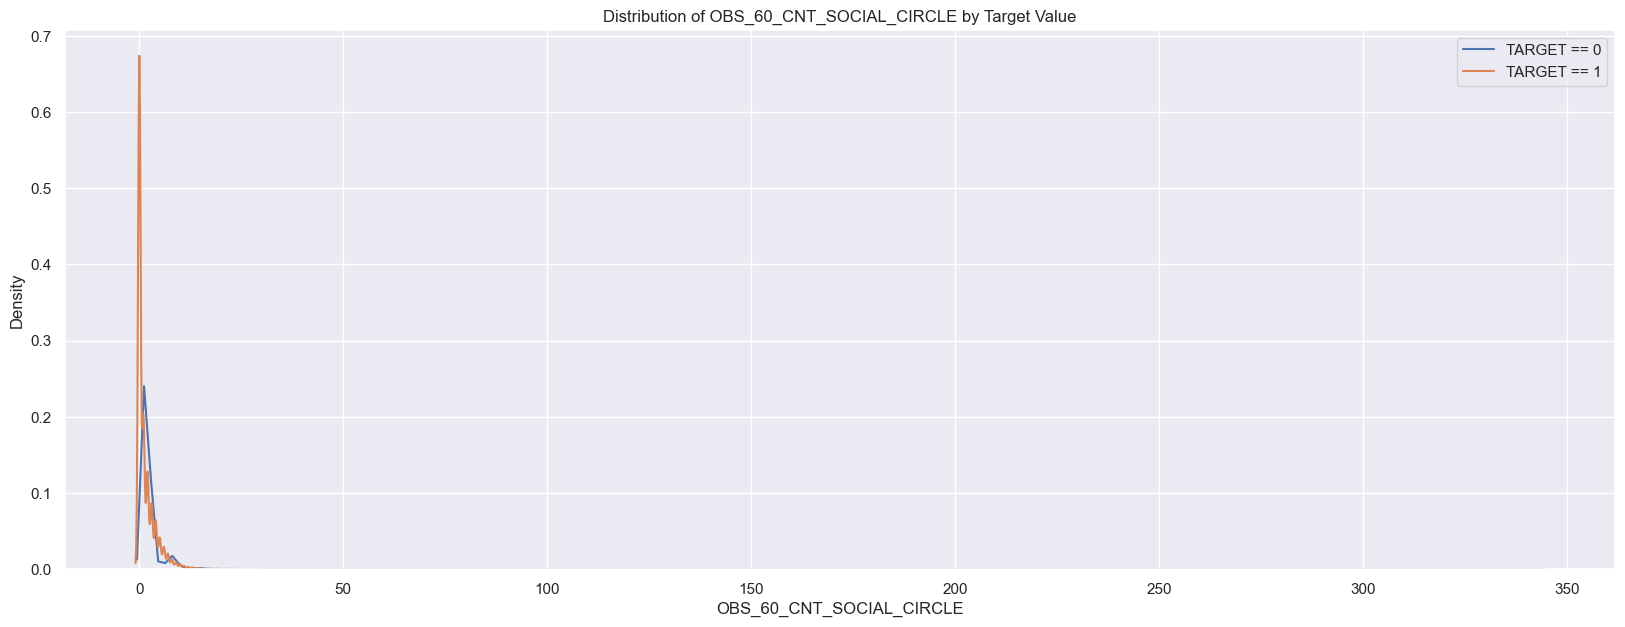

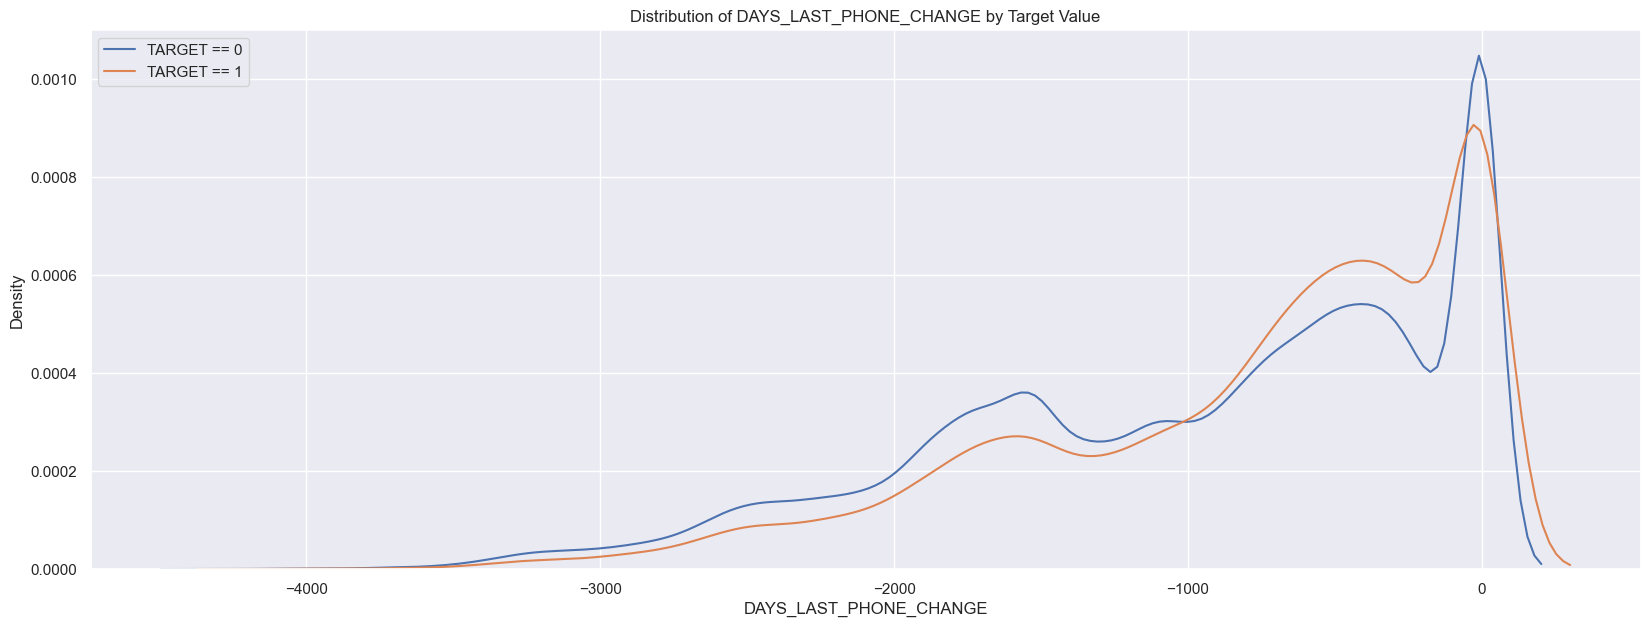

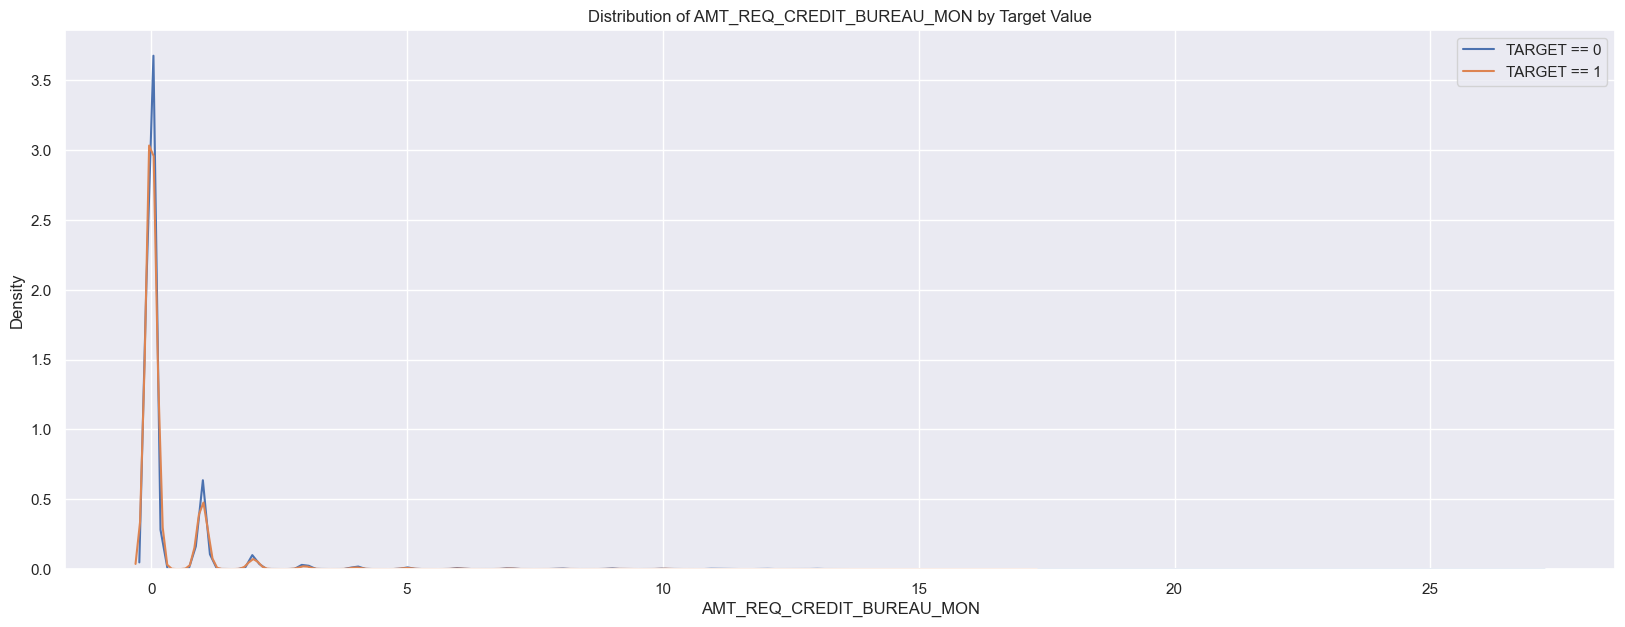

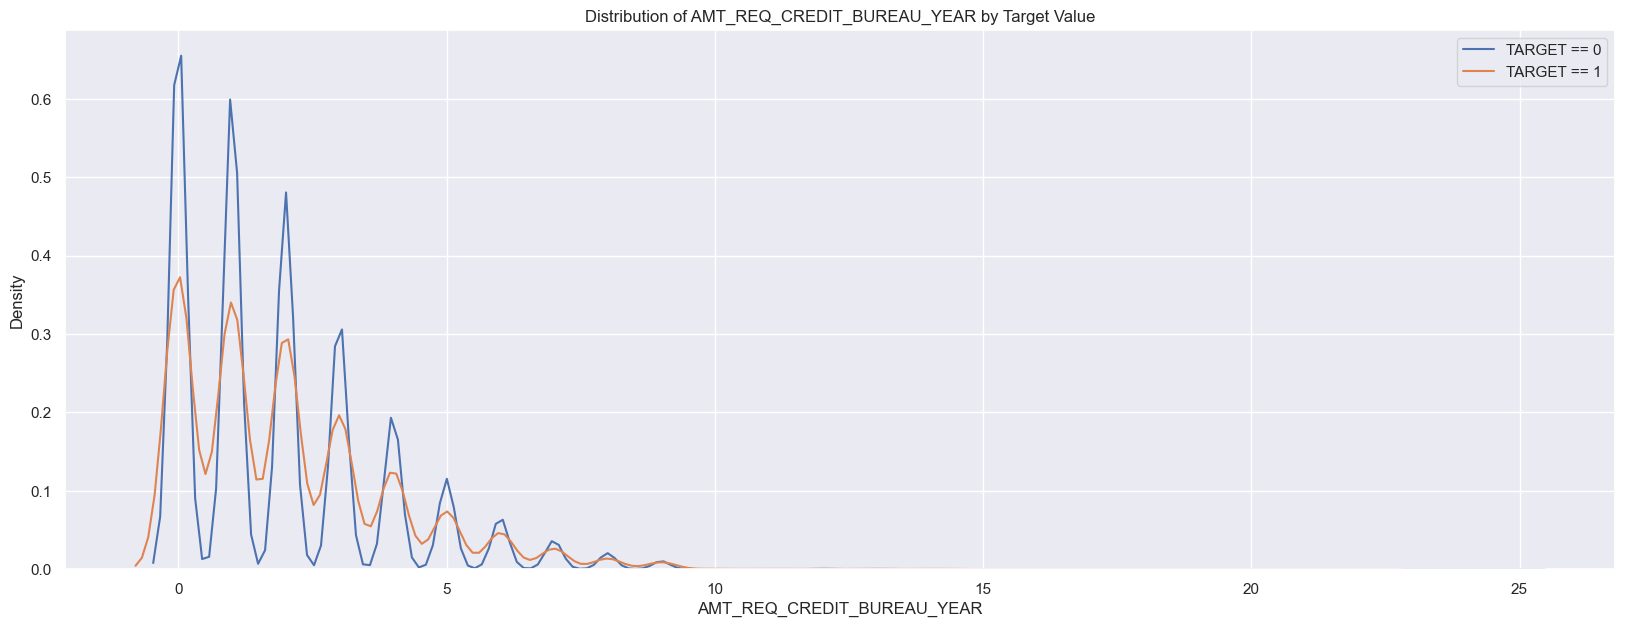

In [54]:
import warnings
warnings.filterwarnings('ignore')

def plot_bivariate_distribution(feature, df):
    plt.figure(figsize=(20, 7))
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'TARGET == 1')
    plt.xlabel(feature); plt.ylabel('Density'); plt.title('Distribution of {} by Target Value'.format(feature))
    plt.legend()
    
# création list to loop over
features = [i for i in df_cleaned.columns if df_cleaned[i].dtype != 'object' and i not in ['TARGET','SK_ID_CURR']]

# Loop over the features and plot each one
for feature in features:
    if feature not in var_discret:
        plot_bivariate_distribution( feature,df=df_cleaned )

In [55]:
from scipy.stats import f_oneway

dict_anova = dict()

for col_num in df_cleaned.select_dtypes(include='number').columns:
    if col_num != 'TARGET':
        dftest = df_cleaned[['TARGET',col_num]].copy().dropna()

        # Supposons que vous ayez une variable qualitative 'variable_qualitative' et une variable quantitative 'variable_quantitative'
        groups = [dftest[dftest['TARGET'] == category][col_num] for category in dftest['TARGET'].unique()]

        # Test d'ANOVA
        dict_anova[col_num] = f_oneway(*groups)[1]

# Il existe une différence statistiquement significative entre les groupes et leurs effets sur la libido, 
# F = 5,12, p-value = 0,0247.

liaison_target = liaison_target.merge(pd.DataFrame([dict_anova]).T.reset_index().rename(columns={'index':'columns',0:'aov'}),
                    on = 'columns',how='outer')
liaison_target.style.highlight_max().format(None, na_rep="-")

### <a name="C34"><font color='teal'>3.4 Features Engineering</font></a> 

In [56]:
import gc
# One-hot encoding for categorical columns with get_dummies
#def one_hot_encoder(df, nan_as_category = True):
#    original_columns = list(df.columns)
#    # exclu les variables qui ne sont de type objet et qui contiennent les char 'FLAG'
#    categorical_columns = [col for col in df.filter(regex='^(?!.*FLAG).*$').columns if df[col].dtype == 'object']
#    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
#    new_columns = [c for c in df.columns if c not in original_columns]
#    return df, new_columns

# Preprocess application_train.csv and application_test.csv
# Optional: Remove 4 applications with XNA CODE_GENDER (train set)
df_cleaned = df_cleaned[df_cleaned['CODE_GENDER'] != 'XNA']

# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_cleaned[bin_feature], uniques = pd.factorize(df_cleaned[bin_feature])
# Categorical features with One-Hot encode
#df_cleaned, cat_cols = one_hot_encoder(df_cleaned, nan_as_category = False)

# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df_cleaned['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
# Some simple new features (percentages)
#df_cleaned['DAYS_EMPLOYED_PERC'] = df_cleaned['DAYS_EMPLOYED'] / df_cleaned['DAYS_BIRTH']
df_cleaned['INCOME_CREDIT_PERC'] = df_cleaned['AMT_INCOME_TOTAL'] / df_cleaned['AMT_CREDIT']
df_cleaned['INCOME_PER_PERSON'] = df_cleaned['AMT_INCOME_TOTAL'] / df_cleaned['CNT_FAM_MEMBERS']
df_cleaned['ANNUITY_INCOME_PERC'] = df_cleaned['AMT_ANNUITY'] / df_cleaned['AMT_INCOME_TOTAL']
df_cleaned['PAYMENT_RATE'] = df_cleaned['AMT_ANNUITY'] / df_cleaned['AMT_CREDIT']

df_cleaned['PERC_CREDIT_GOODS_PRICE'] = df_cleaned['AMT_CREDIT'] / df_cleaned['AMT_GOODS_PRICE']

# revenu par enfant
df_cleaned['INCOME_PER_CHILDREN'] = df_cleaned['AMT_INCOME_TOTAL'] / (df_cleaned['CNT_CHILDREN']+1)

# ratio d'enfant
df_cleaned['CHIDREN_RATE'] = df_cleaned['CNT_CHILDREN'] / df_cleaned['CNT_FAM_MEMBERS']

# ratio defaillance
#df_cleaned['DEF_30_RATE'] = df_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'] / df_cleaned['OBS_30_CNT_SOCIAL_CIRCLE']
#df_cleaned['DEF_60_RATE'] = df_cleaned['DEF_60_CNT_SOCIAL_CIRCLE'] / df_cleaned['OBS_60_CNT_SOCIAL_CIRCLE']


gc.collect()

35701

In [57]:
df_cleaned.shape

(307507, 79)

### <a name="C36"><font color='teal'>3.6 Normalité</font></a> 

In [58]:
from scipy import stats

numCol = df.select_dtypes(include = [np.number]).columns

df_normalite = pd.DataFrame()
list_col = []
list_Shapiro = []
list_kstest = []
list_skewness = []

for i,col in enumerate([x for x in numCol]):
    list_col.append(col)
    list_Shapiro.append(stats.shapiro(df[col].dropna())[1])
    list_kstest.append(stats.kstest(df[col].dropna(), 'norm')[1])
    list_skewness.append(stats.skew(df[col].dropna()) )
    
df_normalite['Colonne'] = list_col
df_normalite['pvalue_Shapiro'] = list_Shapiro
df_normalite['pvalue_Kolmogorov-Smirnov'] = list_kstest
df_normalite['skewness_empirique'] = list_skewness

del list_kstest,list_col,list_Shapiro,list_skewness

df_normalite

Colonne  pvalue_Shapiro  pvalue_Kolmogorov-Smirnov  \
0                          TARGET             0.0                        0.0   
1                    CNT_CHILDREN             0.0                        0.0   
2                AMT_INCOME_TOTAL             0.0                        0.0   
3                      AMT_CREDIT             0.0                        0.0   
4                     AMT_ANNUITY             0.0                        0.0   
5                 AMT_GOODS_PRICE             0.0                        0.0   
6      REGION_POPULATION_RELATIVE             0.0                        0.0   
7                      DAYS_BIRTH             0.0                        0.0   
8                   DAYS_EMPLOYED             0.0                        0.0   
9               DAYS_REGISTRATION             0.0                        0.0   
10                DAYS_ID_PUBLISH             0.0                        0.0   
11                    OWN_CAR_AGE             0.0                        0.0   
12                     FLAG_MOBIL             0.0                        0.0   
13                 FLAG_EMP_PHONE             0.0                        0.0   
14                FLAG_WORK_PHONE             0.0                        0.0   
15               FLAG_CONT_MOBILE             0.0                        0.0   
16                     FLAG_PHONE             0.0                        0.0   
17                     FLAG_EMAIL             0.0                        0.0   
18                CNT_FAM_MEMBERS             0.0                        0.0   
19           REGION_RATING_CLIENT             0.0                        0.0   
20    REGION_RATING_CLIENT_W_CITY             0.0                        0.0   
21        HOUR_APPR_PROCESS_START             0.0                        0.0   
22     REG_REGION_NOT_LIVE_REGION             0.0                        0.0   
23     REG_REGION_NOT_WORK_REGION             0.0                        0.0   
24    LIVE_REGION_NOT_WORK_REGION             0.0                        0.0   
25         REG_CITY_NOT_LIVE_CITY             0.0                        0.0   
26         REG_CITY_NOT_WORK_CITY             0.0                        0.0   
27        LIVE_CITY_NOT_WORK_CITY             0.0                        0.0   
28                   EXT_SOURCE_1             0.0                        0.0   
29                   EXT_SOURCE_2             0.0                        0.0   
30                   EXT_SOURCE_3             0.0                        0.0   
31                 APARTMENTS_AVG             0.0                        0.0   
32               BASEMENTAREA_AVG             0.0                        0.0   
33    YEARS_BEGINEXPLUATATION_AVG             0.0                        0.0   
34                YEARS_BUILD_AVG             0.0                        0.0   
35                 COMMONAREA_AVG             0.0                        0.0   
36                  ELEVATORS_AVG             0.0                        0.0   
37                  ENTRANCES_AVG             0.0                        0.0   
38                  FLOORSMAX_AVG             0.0                        0.0   
39                  FLOORSMIN_AVG             0.0                        0.0   
40                   LANDAREA_AVG             0.0                        0.0   
41           LIVINGAPARTMENTS_AVG             0.0                        0.0   
42                 LIVINGAREA_AVG             0.0                        0.0   
43        NONLIVINGAPARTMENTS_AVG             0.0                        0.0   
44              NONLIVINGAREA_AVG             0.0                        0.0   
45                APARTMENTS_MODE             0.0                        0.0   
46              BASEMENTAREA_MODE             0.0                        0.0   
47   YEARS_BEGINEXPLUATATION_MODE             0.0                        0.0   
48               YEARS_BUILD_MODE             0.0                        0.0   
49                COMMONAR

### <a name="C37"><font color='teal'>3.7 Distribution </font></a> 

### <a name="C38"><font color='teal'>3.8 Multi Colinéarité</font></a> 

In [59]:
df_cleaned.corr().style.background_gradient()

In [90]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i]+'____'+correlations.index[j]+'____'+str(round(correlations.iloc[i,j],2)))
    return correlated_columns

In [108]:
features_corr = correlatedFeatures(df_cleaned,0.7)
features_corr

{'AMT_ANNUITY____AMT_CREDIT____0.77',
 'AMT_GOODS_PRICE____AMT_ANNUITY____0.78',
 'AMT_GOODS_PRICE____AMT_CREDIT____0.99',
 'CHIDREN_RATE____CNT_CHILDREN____0.95',
 'CHIDREN_RATE____CNT_FAM_MEMBERS____0.81',
 'CNT_FAM_MEMBERS____CNT_CHILDREN____0.88',
 'DEF_60_CNT_SOCIAL_CIRCLE____DEF_30_CNT_SOCIAL_CIRCLE____0.86',
 'INCOME_CREDIT_PERC____AMT_INCOME_TOTAL____0.75',
 'INCOME_PER_CHILDREN____AMT_INCOME_TOTAL____0.91',
 'INCOME_PER_CHILDREN____INCOME_PER_PERSON____0.93',
 'INCOME_PER_PERSON____AMT_INCOME_TOTAL____0.86',
 'LIVE_CITY_NOT_WORK_CITY____REG_CITY_NOT_WORK_CITY____0.83',
 'LIVE_REGION_NOT_WORK_REGION____REG_REGION_NOT_WORK_REGION____0.86',
 'OBS_60_CNT_SOCIAL_CIRCLE____OBS_30_CNT_SOCIAL_CIRCLE____1.0',
 'REGION_RATING_CLIENT_W_CITY____REGION_RATING_CLIENT____0.95'}

In [114]:
pd.DataFrame(features_corr)[0].str.split('____',expand=True)

0                           1     2
0   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.86
1               CNT_FAM_MEMBERS                CNT_CHILDREN  0.88
2                   AMT_ANNUITY                  AMT_CREDIT  0.77
3      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE   1.0
4           INCOME_PER_CHILDREN           INCOME_PER_PERSON  0.93
5       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.83
6               AMT_GOODS_PRICE                  AMT_CREDIT  0.99
7   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.95
8                  CHIDREN_RATE             CNT_FAM_MEMBERS  0.81
9      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.86
10              AMT_GOODS_PRICE                 AMT_ANNUITY  0.78
11            INCOME_PER_PERSON            AMT_INCOME_TOTAL  0.86
12                 CHIDREN_RATE                CNT_CHILDREN  0.95
13           INCOME_CREDIT_PERC            AMT_INCOME_TOTAL  0.75
14          INCOME_PER_CHILDREN            AMT_INCOME_TOTAL  0.91

# <a name="C4"><font color='green'>**Partie 4 : Feature Selection**</font></a> 

### <a name="C41"><font color='green'>4.1 Create X & y</font></a> 

In [60]:
X = df_cleaned.dropna().drop(columns = ['TARGET'])
y = df_cleaned.dropna()['TARGET']#.values
X.shape , y.shape

((201088, 78), (201088,))

In [105]:
# Combien de valeur inf peut-on retrouver dans le dataframe
print('Combien de valeur "inf" dans notre dataframe :',X.apply(lambda x: (x==np.inf).sum() ).sum() )

Combien de valeur "inf" dans notre dataframe : 0


### <a name="C42"><font color='green'>4.2 Train Test Split</font></a> 

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, stratify = y)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

print('\n\n\nEncodage Data categorial')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first' ) #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 

print("Notre dataset d'entrainement est une matrice {} et la cible {} dont {:.2%} de valeur 1".format(X_train_encod.shape,y_train.shape, y_train.mean()))
print("Notre dataset de test est une matrice au format {} et la cible {} dont {:.2%} de valeur 1".format(X_test_encod.shape,y_test.shape, y_test.mean()) )

Notre dataset d'entrainement est une matrice (140761, 78) et la cible (140761,)
Notre dataset de test est une matrice au format (60327, 78) et la cible (60327,)



Encodage Data categorial
Notre dataset d'entrainement est une matrice (140761, 175) et la cible (140761,) dont 8.35% de valeur 1
Notre dataset de test est une matrice au format (60327, 175) et la cible (60327,) dont 8.35% de valeur 1


### <a name="C43"><font color='green'>4.3 Scaling DataSet</font>

In [63]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer

scaler = StandardScaler().fit(X_train_encod)
X_train_scaled = scaler.transform(X_train_encod)
X_test_scaled = scaler.transform(X_test_encod)

### <a name="C44"><font color='green'>4.4 Feature importance</font>

#### <font color='green'>4.4.1 Feature importance based on mean decrease in impurity</font>

In [64]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in scaler.get_feature_names_out() ]
feature_names = [i for i in scaler.get_feature_names_out() ]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [65]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.090 seconds


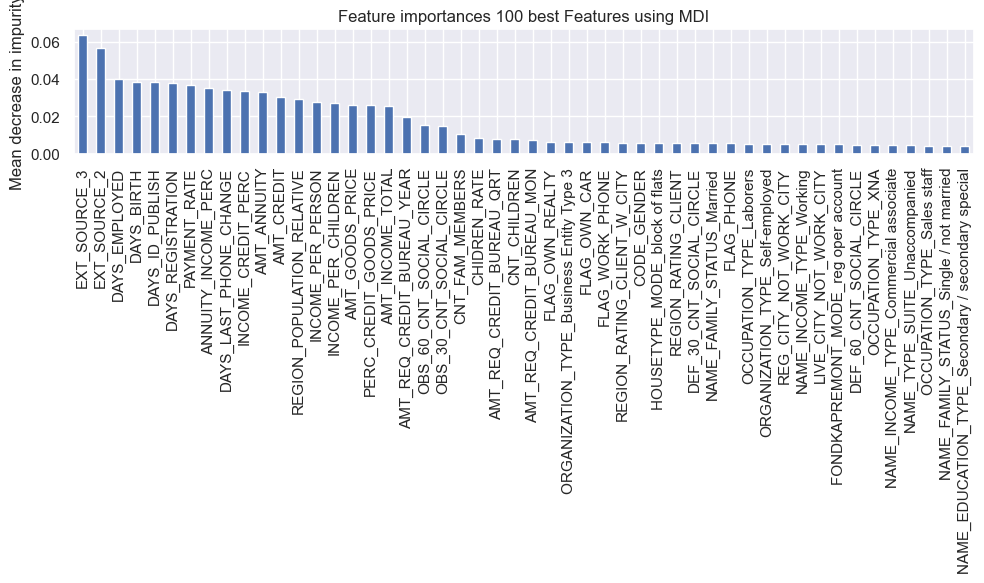

In [66]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:50]

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)#yerr=std,
ax.set_title("Feature importances 100 best Features using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [67]:
forestBest = RandomForestClassifier(random_state=0)
featureRemaindFiRF_index = [feature_names.index(f) for f in forest_importances[:18].index]
featureRemaindFiRF_names = [f for f in forest_importances[:18].index]
forestBest.fit(X_train_scaled[:,featureRemaindFiRF_index], y_train)

RandomForestClassifier(random_state=0)

In [68]:
aucRFav = roc_auc_score(y_test, [y for x,y in forest.predict_proba( X_test_scaled )], average ='weighted').round(4)
aucRFapRD = roc_auc_score(y_test, [y for x,y in forestBest.predict_proba( X_test_scaled[:,featureRemaindFiRF_index] )], average ='weighted').round(4)
print("AUC avant: ",aucRFav,"\nAUC après réduction de dimension: ", aucRFapRD
     )
print('\n')
f1scoreRFav = f1_score(y_test, forest.predict( X_test_scaled ), average ='weighted').round(4)
f1scoreRFapRD = f1_score(y_test, forestBest.predict( X_test_scaled[:,featureRemaindFiRF_index] ), average ='weighted').round(4)
print("f1score avant: ",f1scoreRFav,"\nf1score après réduction de dimension: ", f1scoreRFapRD
     )


AUC avant:  0.7245 
AUC après réduction de dimension:  0.7152


f1score avant:  0.8767 
f1score après réduction de dimension:  0.8783


#### <font color='green'>4.4.2 Permutation Feature Importance Regression Logistics</font>

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_scaled, y_train)
print(
    'accuracy :', model.score(X_test_scaled, y_test).round(5) ,
    'AUC:',roc_auc_score(y_test, [y for x,y in model.predict_proba( X_test_scaled )], average ='weighted').round(5)
)

accuracy : 0.91624 AUC: 0.75322


In [70]:
%%time
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test_scaled, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<50}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

AMT_GOODS_PRICE                                   0.004 +/- 0.000
AMT_CREDIT                                        0.002 +/- 0.000
NAME_EDUCATION_TYPE_Higher education              0.001 +/- 0.000
NAME_EDUCATION_TYPE_Secondary / secondary special 0.001 +/- 0.000
FLAG_DOCUMENT_3                                   0.001 +/- 0.000
NAME_EDUCATION_TYPE_Incomplete higher             0.000 +/- 0.000
REG_REGION_NOT_LIVE_REGION                        0.000 +/- 0.000
ORGANIZATION_TYPE_Industry: type 9                0.000 +/- 0.000
FLAG_DOCUMENT_18                                  0.000 +/- 0.000
ORGANIZATION_TYPE_Cleaning                        0.000 +/- 0.000
ORGANIZATION_TYPE_Trade: type 1                   0.000 +/- 0.000
CPU times: total: 13min 13s
Wall time: 4min 8s


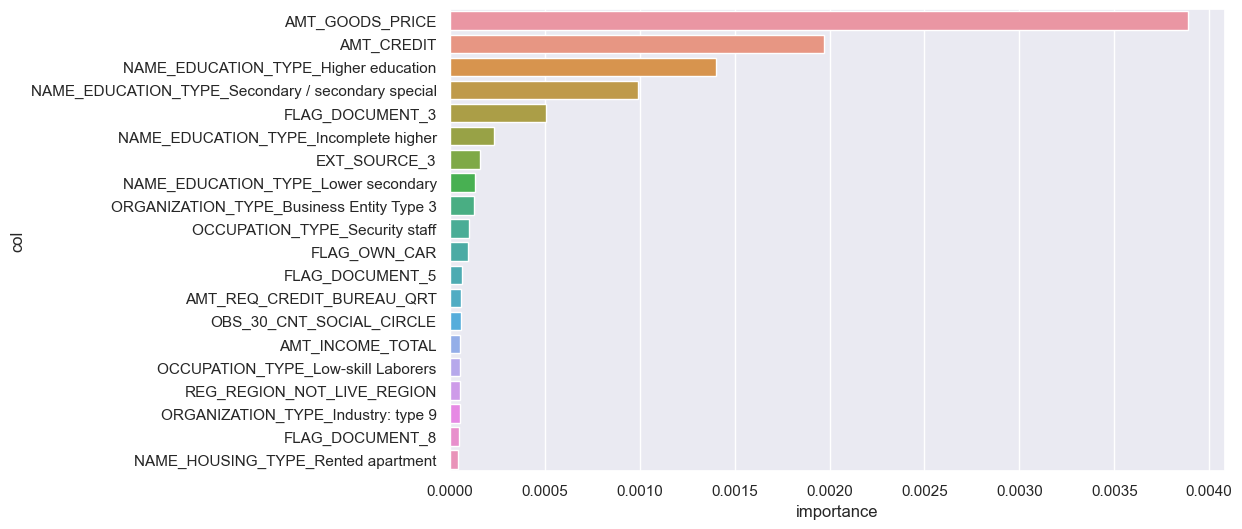

In [71]:
permFeature = pd.DataFrame({'importance':r.importances_mean,'col':scaler.get_feature_names_out() } )
sns.barplot(data = permFeature.sort_values(by='importance',ascending=False).head(20), y='col',x= 'importance');

In [72]:
#featureRemaindPFI_names = ['AMT_GOODS_PRICE','AMT_CREDIT','INCOME_PER_CHILDREN','AMT_INCOME_TOTAL', 'AMT_ANNUITY',
#                     'NAME_TYPE_SUITE_Group of people','DEF_60_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE_Transport: type 3']

featureRemaindPFI_names = permFeature.sort_values(by='importance',ascending=False).col[:80].to_list()
LRBest = LogisticRegression()

featureRemaindFiLR = [feature_names.index(f) for f in featureRemaindPFI_names]
LRBest.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR], y_train)

aucLRav = roc_auc_score(y_test, [y for x,y in model.predict_proba( X_test_scaled )], average ='weighted').round(4)
aucLRapRD = roc_auc_score(y_test, [y for x,y in LRBest.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] )], average ='weighted').round(4)
print("AUC avant: ",aucLRav,"\nAUC après réduction de dimension: ", aucLRapRD
     )
print('\n')

f1scoreLRav = f1_score(y_test, model.predict( X_test_scaled ), average ='weighted').round(4)
f1scoreLRapRD = f1_score(y_test, LRBest.predict( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] ), average ='weighted').round(4)
print("f1 score avant: ",f1scoreLRav,"\nf1 score après réduction de dimension: ", f1scoreLRapRD
     )

AUC avant:  0.7532 
AUC après réduction de dimension:  0.7201


f1 score avant:  0.8785 
f1 score après réduction de dimension:  0.8768


In [73]:
AUC_LR_nbfeatures, f1score_LR_nbfeatures = dict(),dict()
list_auc,list_f1score = list(), list()

for c in range(1, X_train_scaled.shape[1]+1 ):
    featureRemaindPFI_names = permFeature.sort_values(by='importance',ascending=False).col[0:c].to_list()
    LRBest = LogisticRegression()

    featureRemaindFiLR = [feature_names.index(f) for f in featureRemaindPFI_names]
    LRBest.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR], y_train)
    tempAUC = roc_auc_score(y_test, [y for x,y in LRBest.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] )], average ='weighted').round(4)
    AUC_LR_nbfeatures[len(featureRemaindPFI_names)] = tempAUC
    
    tempf1score = roc_auc_score(y_test, LRBest.predict( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR] ), average ='weighted').round(4)
    f1score_LR_nbfeatures[len(featureRemaindPFI_names)] = tempf1score
    
    list_auc.append(tempAUC)
    list_f1score.append(tempf1score)

In [74]:
AUC_LR_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_auc[:-1], list_auc[1:])]},
                           index=featureRemaindPFI_names[1:])


F1score_LR_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_f1score[:-1], list_f1score[1:])]},
                                index=featureRemaindPFI_names[1:])

#AUC_LR_delta.sort_values(ascending=False, by= 'value').head(54)

<Axes: >

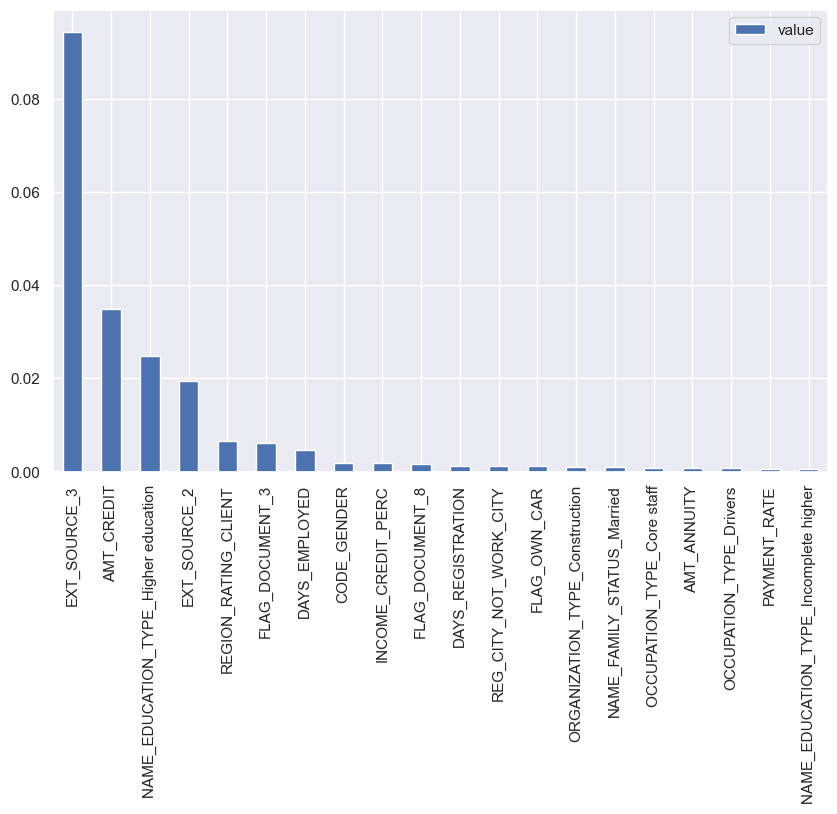

In [75]:
AUC_LR_delta.sort_values(ascending=False, by= 'value').head(20).plot(kind='bar')

<Axes: >

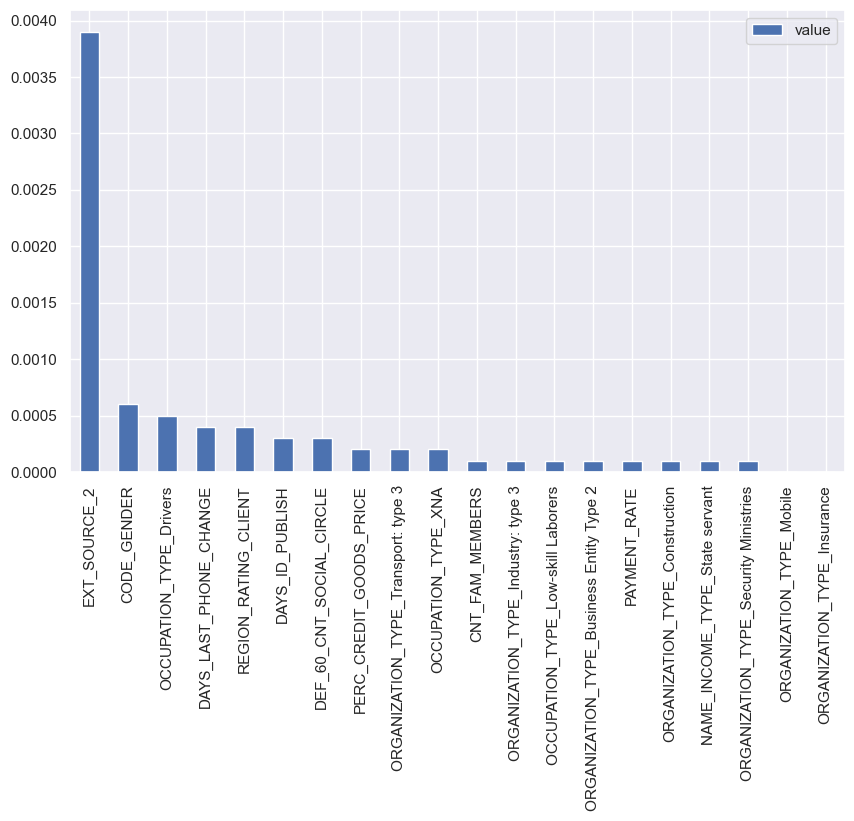

In [76]:
F1score_LR_delta.sort_values(ascending=False, by= 'value').head(20).plot(kind='bar')

In [77]:
featureRemaindFiLR = AUC_LR_delta.sort_values(ascending=False, by= 'value').head(40).index
LRBest2 = LogisticRegression()

featureRemaindFiLR_index = [feature_names.index(f) for f in featureRemaindFiLR]
LRBest2.fit(pd.DataFrame(X_train_scaled).iloc[:,featureRemaindFiLR_index], y_train)
roc_auc_score(y_test, [y for x,y in LRBest2.predict_proba( pd.DataFrame(X_test_scaled ).iloc[:,featureRemaindFiLR_index] )], average ='weighted').round(4)

0.7487

In [78]:
featureRemaindFiLR_names = list()
for f in df.columns:
    if f in AUC_LR_delta.sort_values(ascending=False, by= 'value').head(40).index:
        featureRemaindFiLR_names.append(f)
        
print('Le nombre de features conservé:',len( featureRemaindFiLR_names ))

Le nombre de features conservé: 19


In [79]:
np.array(featureRemaindFiLR_names)

array(['CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT'], dtype='<U25')

#### <font color='green'>4.4.3 Selecting Features with Sequential Feature Selection </font>

#### <font color='green'>4.4.4 Others ways to select Feature </font>

#### <font color='green'>4.4.5 Permutation Feature Importance pipeline </font>

In [80]:
%%time
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

#Numerical featues
numeric_features = make_column_selector(dtype_include=np.number)
numeric_transformer = Pipeline(
    steps=[('impNumerical', SimpleImputer(strategy="median")) ]
)

# categorials features
categorical_features = make_column_selector(dtype_include="object")
categorical_transformer = Pipeline(
    steps=[
        ('impCat', SimpleImputer(strategy = 'most_frequent')),
        ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore',sparse=False)),
    ])

# columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num",  numeric_transformer, numeric_features),
        ("cat",  categorical_transformer, categorical_features),
    ])

# pipeline
featureImportancePipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model",HistGradientBoostingClassifier())]
)

modelpipe = featureImportancePipeline.fit(X_train, y_train)

CPU times: total: 1min 2s
Wall time: 18.4 s


In [81]:
%%time
r = permutation_importance(modelpipe, X_test, y_test,
                           n_repeats=20,
                           random_state=0)

CPU times: total: 1h 51min 37s
Wall time: 26min 6s


In [82]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<40}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

FLAG_DOCUMENT_4                         0.000 +/- 0.000
FLAG_DOCUMENT_3                         0.000 +/- 0.000
INCOME_PER_CHILDREN                     0.000 +/- 0.000


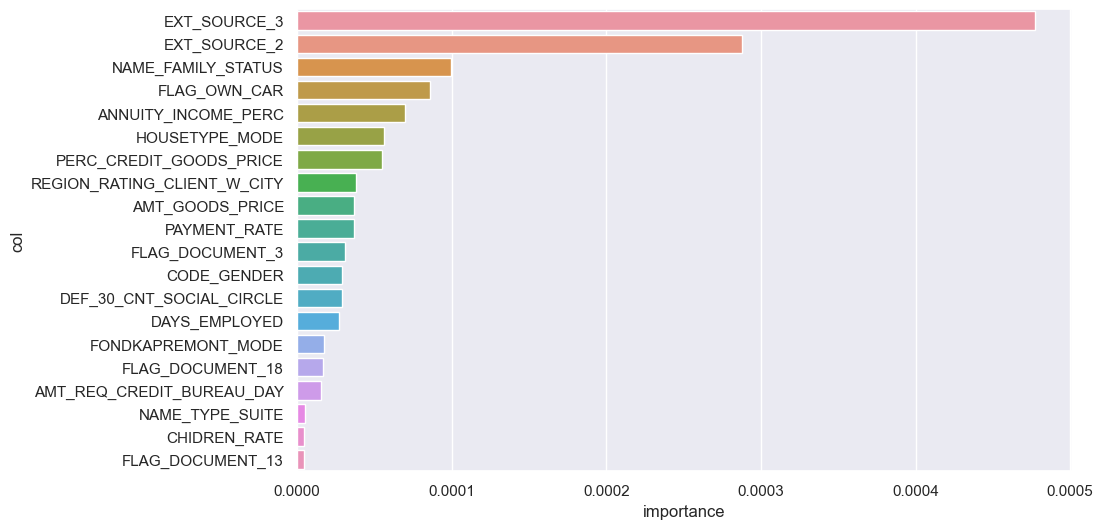

In [83]:
permFeature = pd.DataFrame({'importance':r.importances_mean,'col':X_test.columns} )
sns.barplot(data = permFeature.sort_values(by='importance',ascending=False).head(20), y='col',x= 'importance');

In [84]:
AUC_hist_nbfeatures = dict()
list_auc = list()
for c in range(1,len(X_train.columns)):
    featureRemaindPFI_namespipe = permFeature.sort_values(by='importance',ascending=False).col[0:c].to_list()

    modelpipe.fit(X_train.loc[:,featureRemaindPFI_namespipe], y_train)
    tempAUC = roc_auc_score(y_test, [y for x,y in modelpipe.predict_proba( X_test.loc[:,featureRemaindPFI_namespipe] )], average ='weighted').round(4)
    AUC_hist_nbfeatures[len(featureRemaindPFI_namespipe)] = tempAUC
    list_auc.append(tempAUC)

<Axes: >

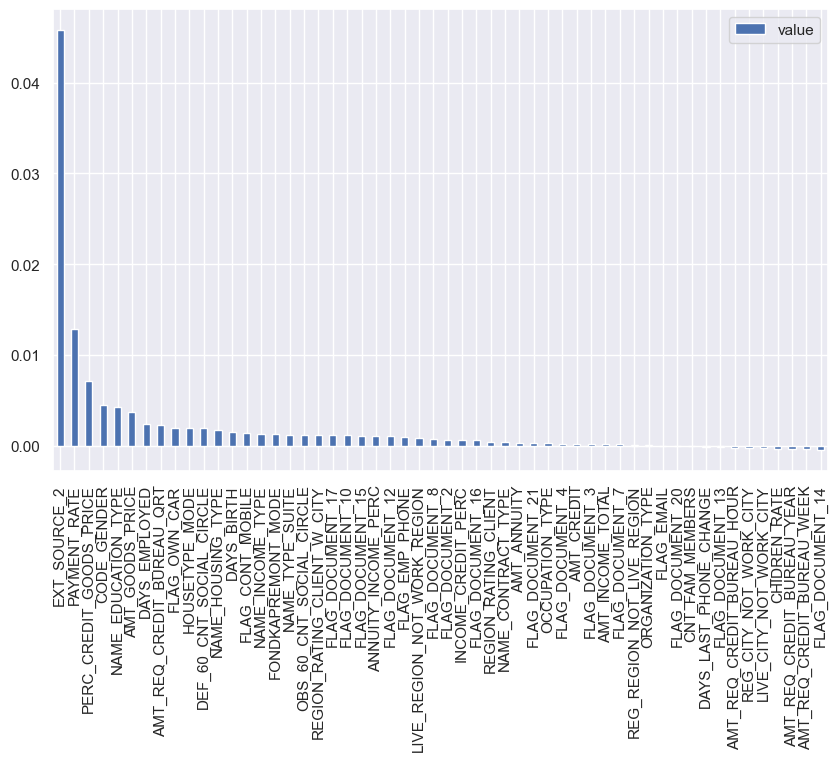

In [85]:
AUC_Hist_delta = pd.DataFrame({'value' : [y-x for x,y in zip(list_auc[:-1], list_auc[1:])]},
                           index=featureRemaindPFI_namespipe[1:])

AUC_Hist_delta.sort_values(ascending=False, by= 'value').head(54).plot(kind='bar')

In [86]:
(AUC_Hist_delta.sort_values(ascending=False, by= 'value')>0.001).value.sum()

24

In [87]:
featureRemaindFihist = AUC_Hist_delta.sort_values(ascending=False, by= 'value').head(22).index

modelpipe.fit( X_train.loc[:,featureRemaindFihist], y_train)
roc_auc_score(y_test, [y for x,y in modelpipe.predict_proba( X_test.loc[:,featureRemaindFihist] )], average ='weighted').round(4)

0.7252

### La liste de colonne à converser

In [88]:
col_a_conserver = list(set(featureRemaindFiLR_names).union(set(featureRemaindFihist)).union(featureRemaindFiRF_names))
len(col_a_conserver)

42

In [89]:
df_cleaned[['TARGET']+col_a_conserver].corr().style.background_gradient()

In [90]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i]+'____'+correlations.index[j]+'____'+str(round(correlations.iloc[i,j],2)))
    return correlated_columns

In [91]:
# Get a set of correlated features, based on threshold correlation of 0.85
cf = correlatedFeatures(df_cleaned[col_a_conserver], 0.7)
cf

{'AMT_ANNUITY____AMT_GOODS_PRICE____0.78',
 'AMT_CREDIT____AMT_ANNUITY____0.77',
 'AMT_CREDIT____AMT_GOODS_PRICE____0.99',
 'AMT_INCOME_TOTAL____INCOME_CREDIT_PERC____0.75',
 'AMT_INCOME_TOTAL____INCOME_PER_CHILDREN____0.91',
 'AMT_INCOME_TOTAL____INCOME_PER_PERSON____0.86',
 'INCOME_PER_PERSON____INCOME_PER_CHILDREN____0.93',
 'REGION_RATING_CLIENT_W_CITY____REGION_RATING_CLIENT____0.95'}

## Suppression des colonnes trop corrélés entre elles parmi les colonnes conservées

In [ ]:
col_a_conserver.remove('OBS_60_CNT_SOCIAL_CIRCLE')
col_a_conserver.remove('REGION_RATING_CLIENT')
col_a_conserver.remove('INCOME_PER_PERSON')
col_a_conserver.remove('DEF_30_CNT_SOCIAL_CIRCLE')
col_a_conserver = ['SK_ID_CURR','TARGET']+col_a_conserver

In [95]:
col_a_conserver = ['SK_ID_CURR','TARGET']+col_a_conserver
col_a_conserver

['SK_ID_CURR',
 'TARGET',
 'INCOME_PER_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'FLAG_DOCUMENT_15',
 'PERC_CREDIT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_17',
 'INCOME_CREDIT_PERC',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'FLAG_DOCUMENT_16',
 'DAYS_BIRTH',
 'PAYMENT_RATE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_8',
 'EXT_SOURCE_2',
 'NAME_HOUSING_TYPE',
 'DAYS_EMPLOYED',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'ANNUITY_INCOME_PERC',
 'HOUSETYPE_MODE',
 'CODE_GENDER',
 'FONDKAPREMONT_MODE',
 'FLAG_OWN_CAR',
 'AMT_ANNUITY',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_18',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_DOCUMENT_10',
 'AMT_INCOME_TOTAL']

In [100]:
colTemp = [col for col in col_a_conserver if col not in 'SK_ID_CURR']
df_cleaned[colTemp].isna().sum()/df_cleaned.shape[0]

TARGET                         0.000000
INCOME_PER_CHILDREN            0.000000
REGION_POPULATION_RELATIVE     0.000000
FLAG_DOCUMENT_15               0.000000
PERC_CREDIT_GOODS_PRICE        0.000904
EXT_SOURCE_3                   0.198256
AMT_GOODS_PRICE                0.000904
FLAG_CONT_MOBILE               0.000000
FLAG_DOCUMENT_17               0.000000
INCOME_CREDIT_PERC             0.000000
FLAG_DOCUMENT_3                0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.135018
FLAG_DOCUMENT_16               0.000000
DAYS_BIRTH                     0.000000
PAYMENT_RATE                   0.000039
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
DAYS_REGISTRATION              0.000000
DAYS_LAST_PHONE_CHANGE         0.000003
FLAG_DOCUMENT_8                0.000000
EXT_SOURCE_2                   0.002146
NAME_HOUSING_TYPE              0.000000
DAYS_EMPLOYED                  0.180074
DEF_60_CNT_SOCIAL_CIRCLE       0.003320


### <a name="C45"><font color='green'>4.5 Compute metrics</font>

### Ajout d'autres données

In [ ]:
!python --version

#### Best model

# <a name="C5"><font color='purple'>**Partie 5 : Export data**</font></a> 

### <a name="C41"><font color='purple'>4.1 Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</font></a> 

### <a name="C52"><font color='purple'>5.2 Rename columns</font></a> 

### <a name="C53"><font color='purple'>5.3 Drop useless columns</font></a> 

### <a name="C54"><font color='purple'>5.4 Export csv</font></a> 

In [101]:
[col for col in col_a_conserver if col not in df.columns]

['SK_ID_CURR',
 'INCOME_PER_CHILDREN',
 'PERC_CREDIT_GOODS_PRICE',
 'INCOME_CREDIT_PERC',
 'PAYMENT_RATE',
 'ANNUITY_INCOME_PERC']

In [102]:
len(col_a_conserver)

41

In [116]:
import joblib
col_a_conserver = [col for col in col_a_conserver if col in df.columns]
joblib.dump(col_a_conserver,'data/cleaned/list_col_to_keep_from_train_application_final.joblib')

['data/cleaned/list_col_to_keep_from_train_application_final.joblib']

</br>

</br>

</br>

</br>

</br>